<a href="https://colab.research.google.com/github/shouryacoded/Python-projects/blob/main/mistral/ocr/structured_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Cookbook

---

## OCR Exploration and Structured Outputs
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model.

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Model Used
- Mistral OCR
- Pixtral 12B & Ministral 8B


## Setup

First, let's install `mistralai` and download the required files.

In [16]:
%%capture
!pip install mistralai
from google.colab import files

### Download PDF and image files

In [17]:
uploaded = files.upload()

for filename in uploaded.keys():
  print(f"Uploaded file : {filename}")

%%capture
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png

Saving mistral7b.pdf to mistral7b.pdf
Uploaded file : mistral7b.pdf


## Mistral OCR with PDF

We will need to set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [18]:
# Initialize Mistral client with API key
from mistralai import Mistral

api_key = "KLHYTJn7cFHe9D79h223lQkLNn2igmby" # Replace with your API key
client = Mistral(api_key=api_key)

There are two types of files you can apply OCR to:
- 1. PDF files
- 2. Image files

Let's start with a PDF file:

In [19]:
# Import required libraries
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

# Verify PDF file exists
pdf_file = Path("mistral7b.pdf")
assert pdf_file.is_file()

# Upload PDF file to Mistral's OCR service
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

# Get URL for the uploaded file
signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

# Process PDF with OCR, including embedded images
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)

# Convert response to JSON format
response_dict = json.loads(pdf_response.model_dump_json())

print(json.dumps(response_dict, indent=4)[0:1000]) # check the first 1000 characters

{
    "pages": [
        {
            "index": 0,
            "markdown": "![img-0.jpeg](img-0.jpeg)",
            "images": [
                {
                    "id": "img-0.jpeg",
                    "top_left_x": 98,
                    "top_left_y": 83,
                    "bottom_right_x": 1630,
                    "bottom_right_y": 2112,
                    "image_base64": "


View the result with the following:

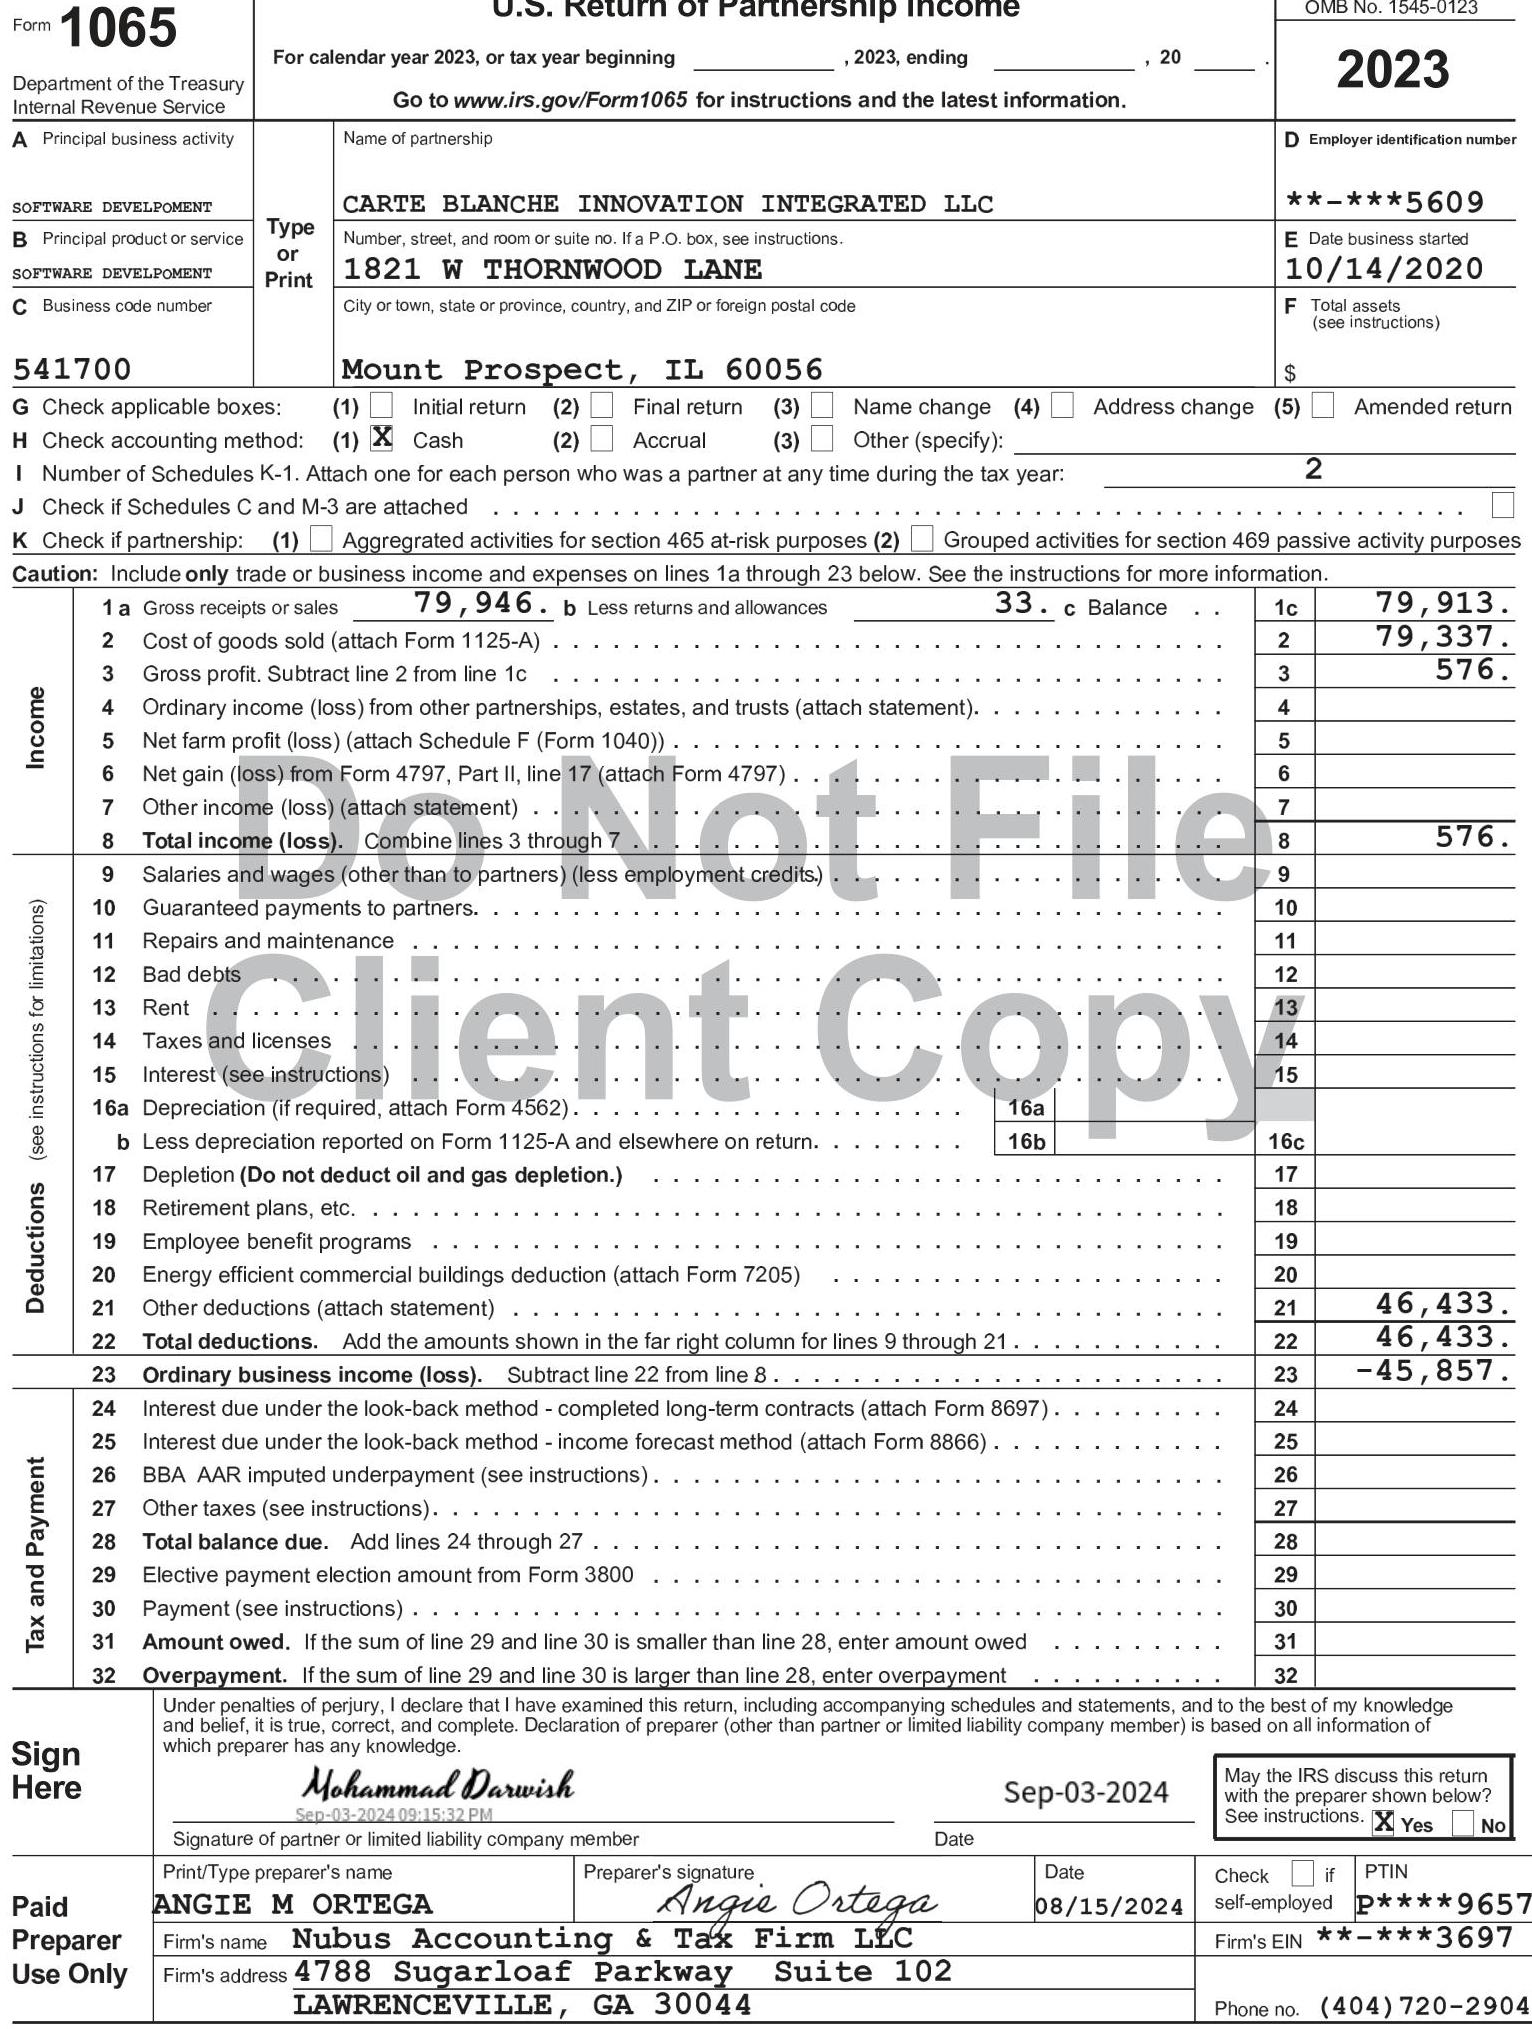

| Schedule B | Other Information |  |  |  |
| :--: | :--: | :--: | :--: | :--: |
| 1 | What type of entity is filing this return? Check the applicable box: |  |  | Yes No |
| a | Domestic general partnership | b | Domestic limited partnership |  |
| c | $\mathbf{X}$ | Domestic limited liability company | d | Domestic limited liability partnership |
| e | Foreign partnership | f | Other: |  |

2 At the end of the tax year:
a Did any foreign or domestic corporation, partnership (including any entity treated as a partnership), trust, or taxexempt organization, or any foreign government own, directly or indirectly, an interest of $50 \%$ or more in the profit, loss, or capital of the partnership? For rules of constructive ownership, see instructions. If "Yes," attach Schedule B-1, Information on Partners Owning 50\% or More of the Partnership . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

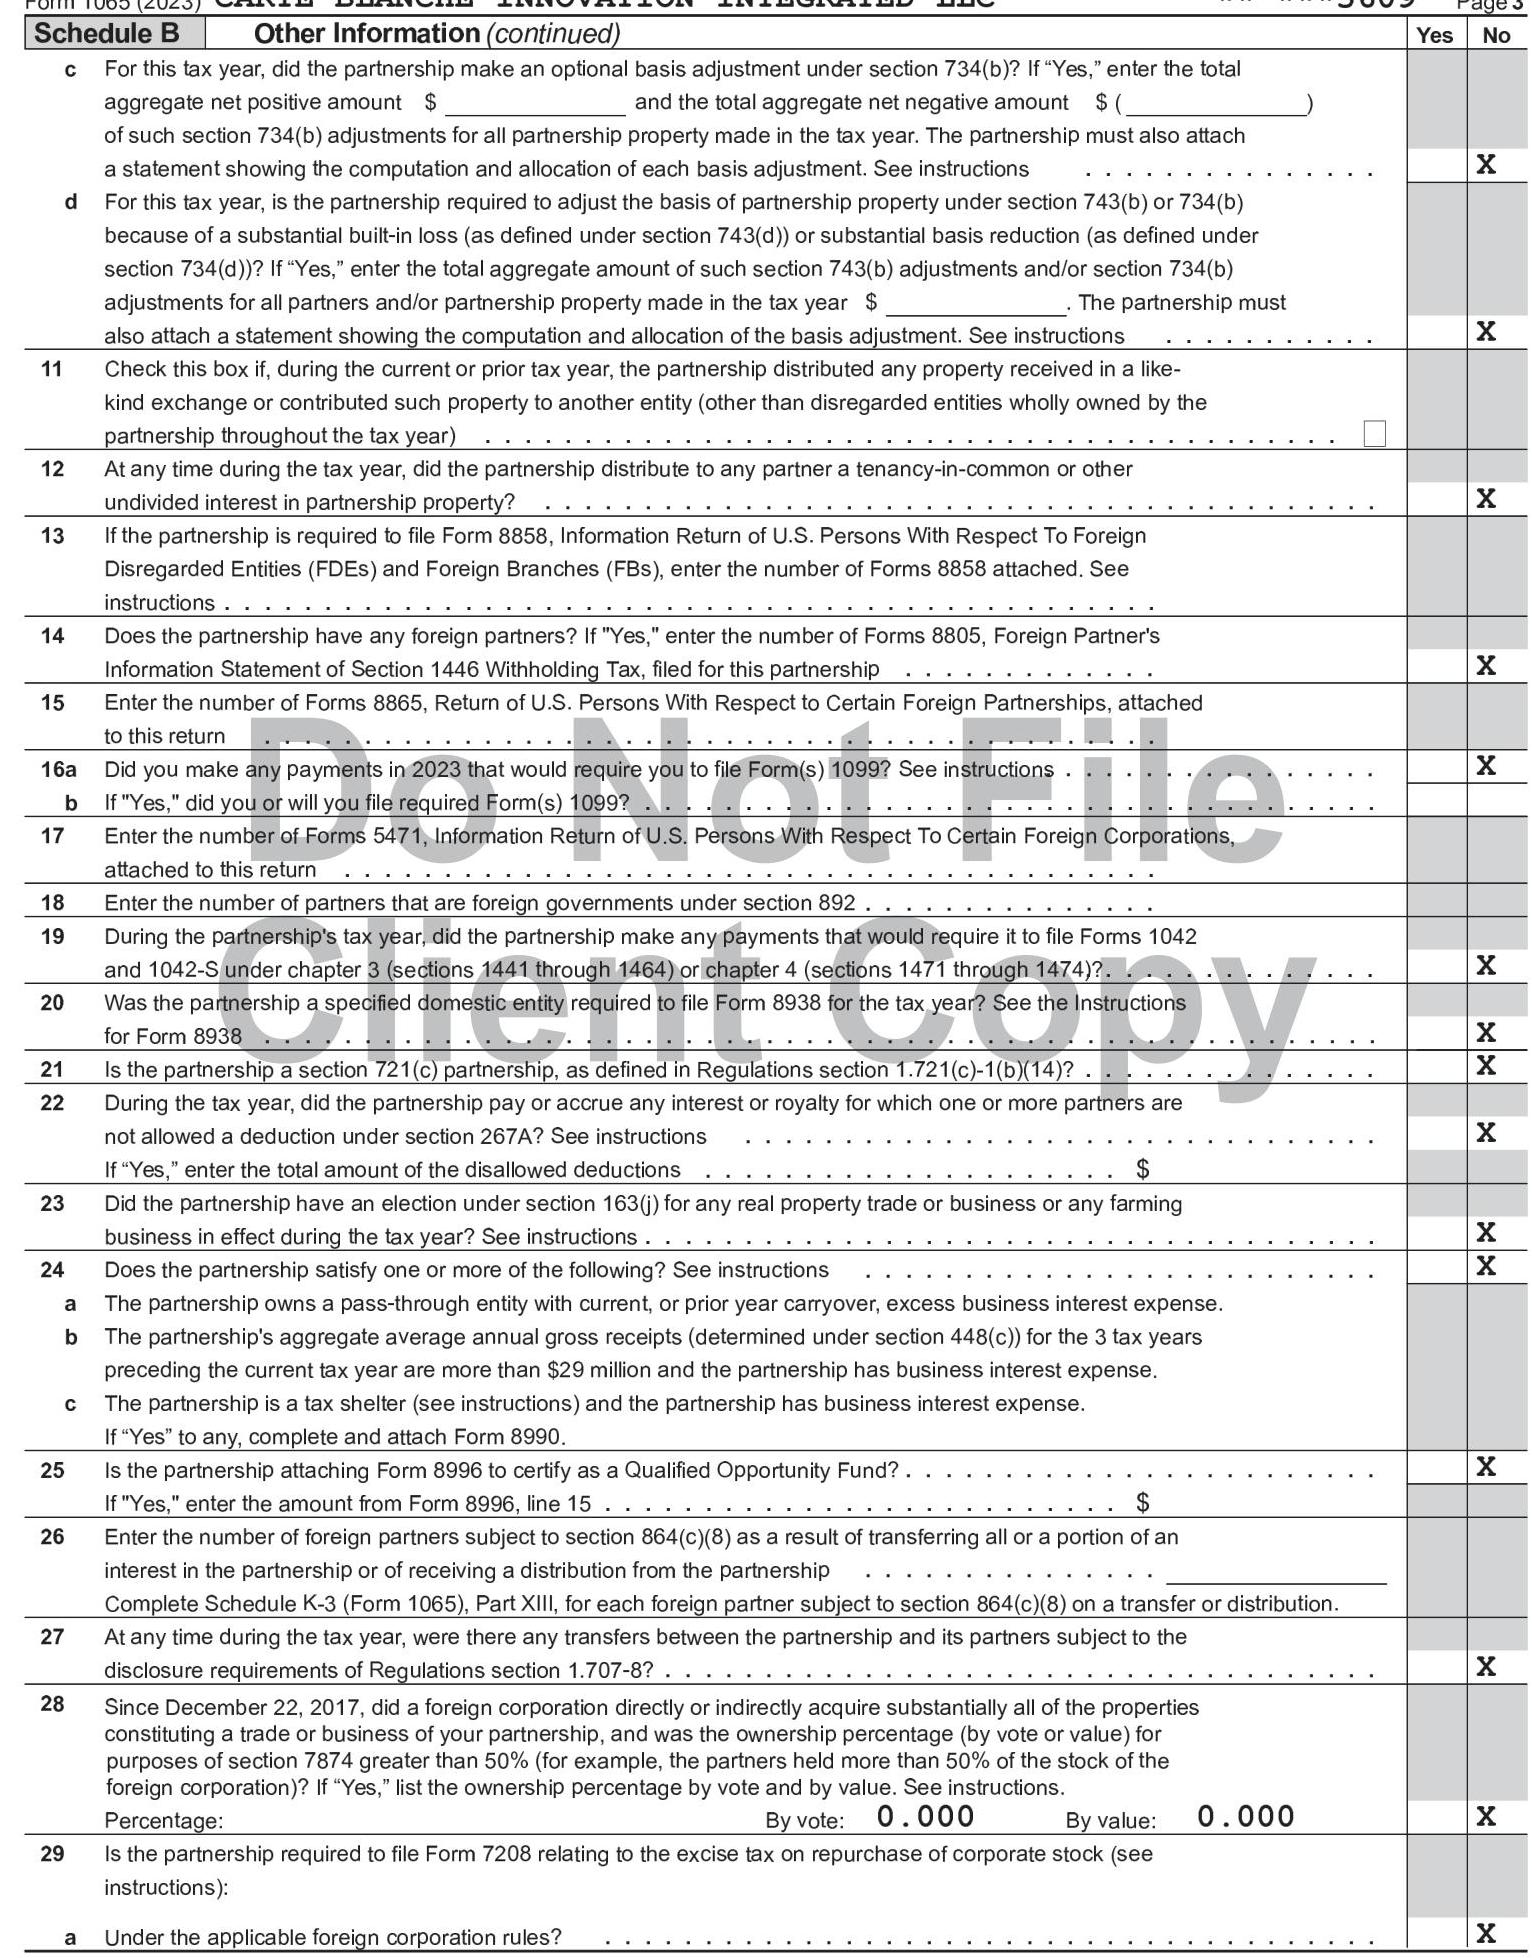

Form 1065 (2023)
Page 4
Schedule B Other Information (continued)
Yes No
b Under the covered surrogate foreign corporation rules? ..... $X$
If "Yes" to either (a) or (b), complete Form 7208, Excise Tax on Repurchase of Corporate Stock. See the Instructions for Form 7208.
30 At any time during this tax year, did the partnership (a) receive (as a reward, award, or payment for property or services); or (b) sell, exchange, or otherwise dispose of a digital asset (or financial interest in a digital asset)? See instructions ..... $X$
31 Is the partnership electing out of the centralized partnership audit regime under section 6221(b)? See instructions. ..... $X$
If "Yes," the partnership must complete Schedule B-2 (Form 1065). Enter the total from Schedule B-2, Part III, line 3 . ..... $X$
If "No," complete Designation of Partnership Representative below.
Designation of Partnership Representative (see instructions)
Enter below the information for the partnership representative (PR) for the tax year covered by this return.
Name of PR MOHAMMAD DARWISH
U.S. address 1821 W THORNWOOD
of PR
MOUNT PROSPECT, IL 60056
U.S. phone number of PR
$(414) 213-8077$
If the PR is an entity, name of the designated individual for the PR
U.S. address of
designated individual
U.S. phone number of designated individual
UFA
Form 1065 (2023)
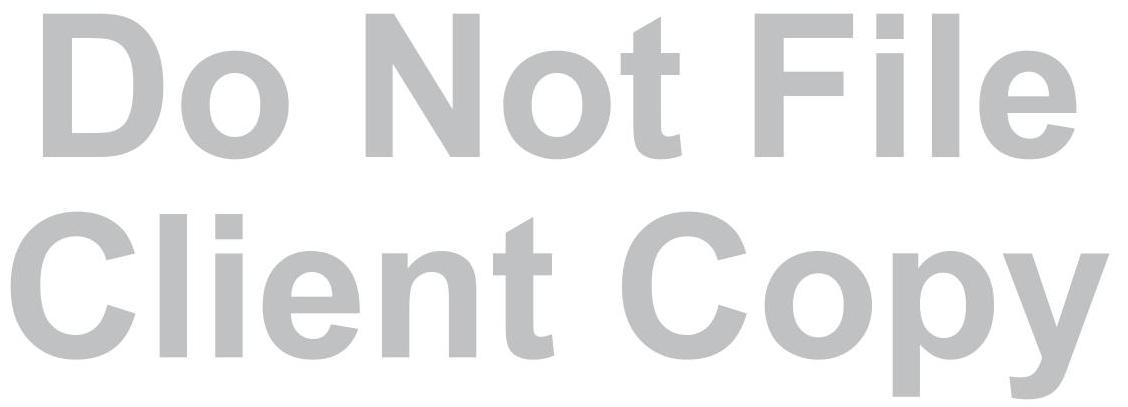

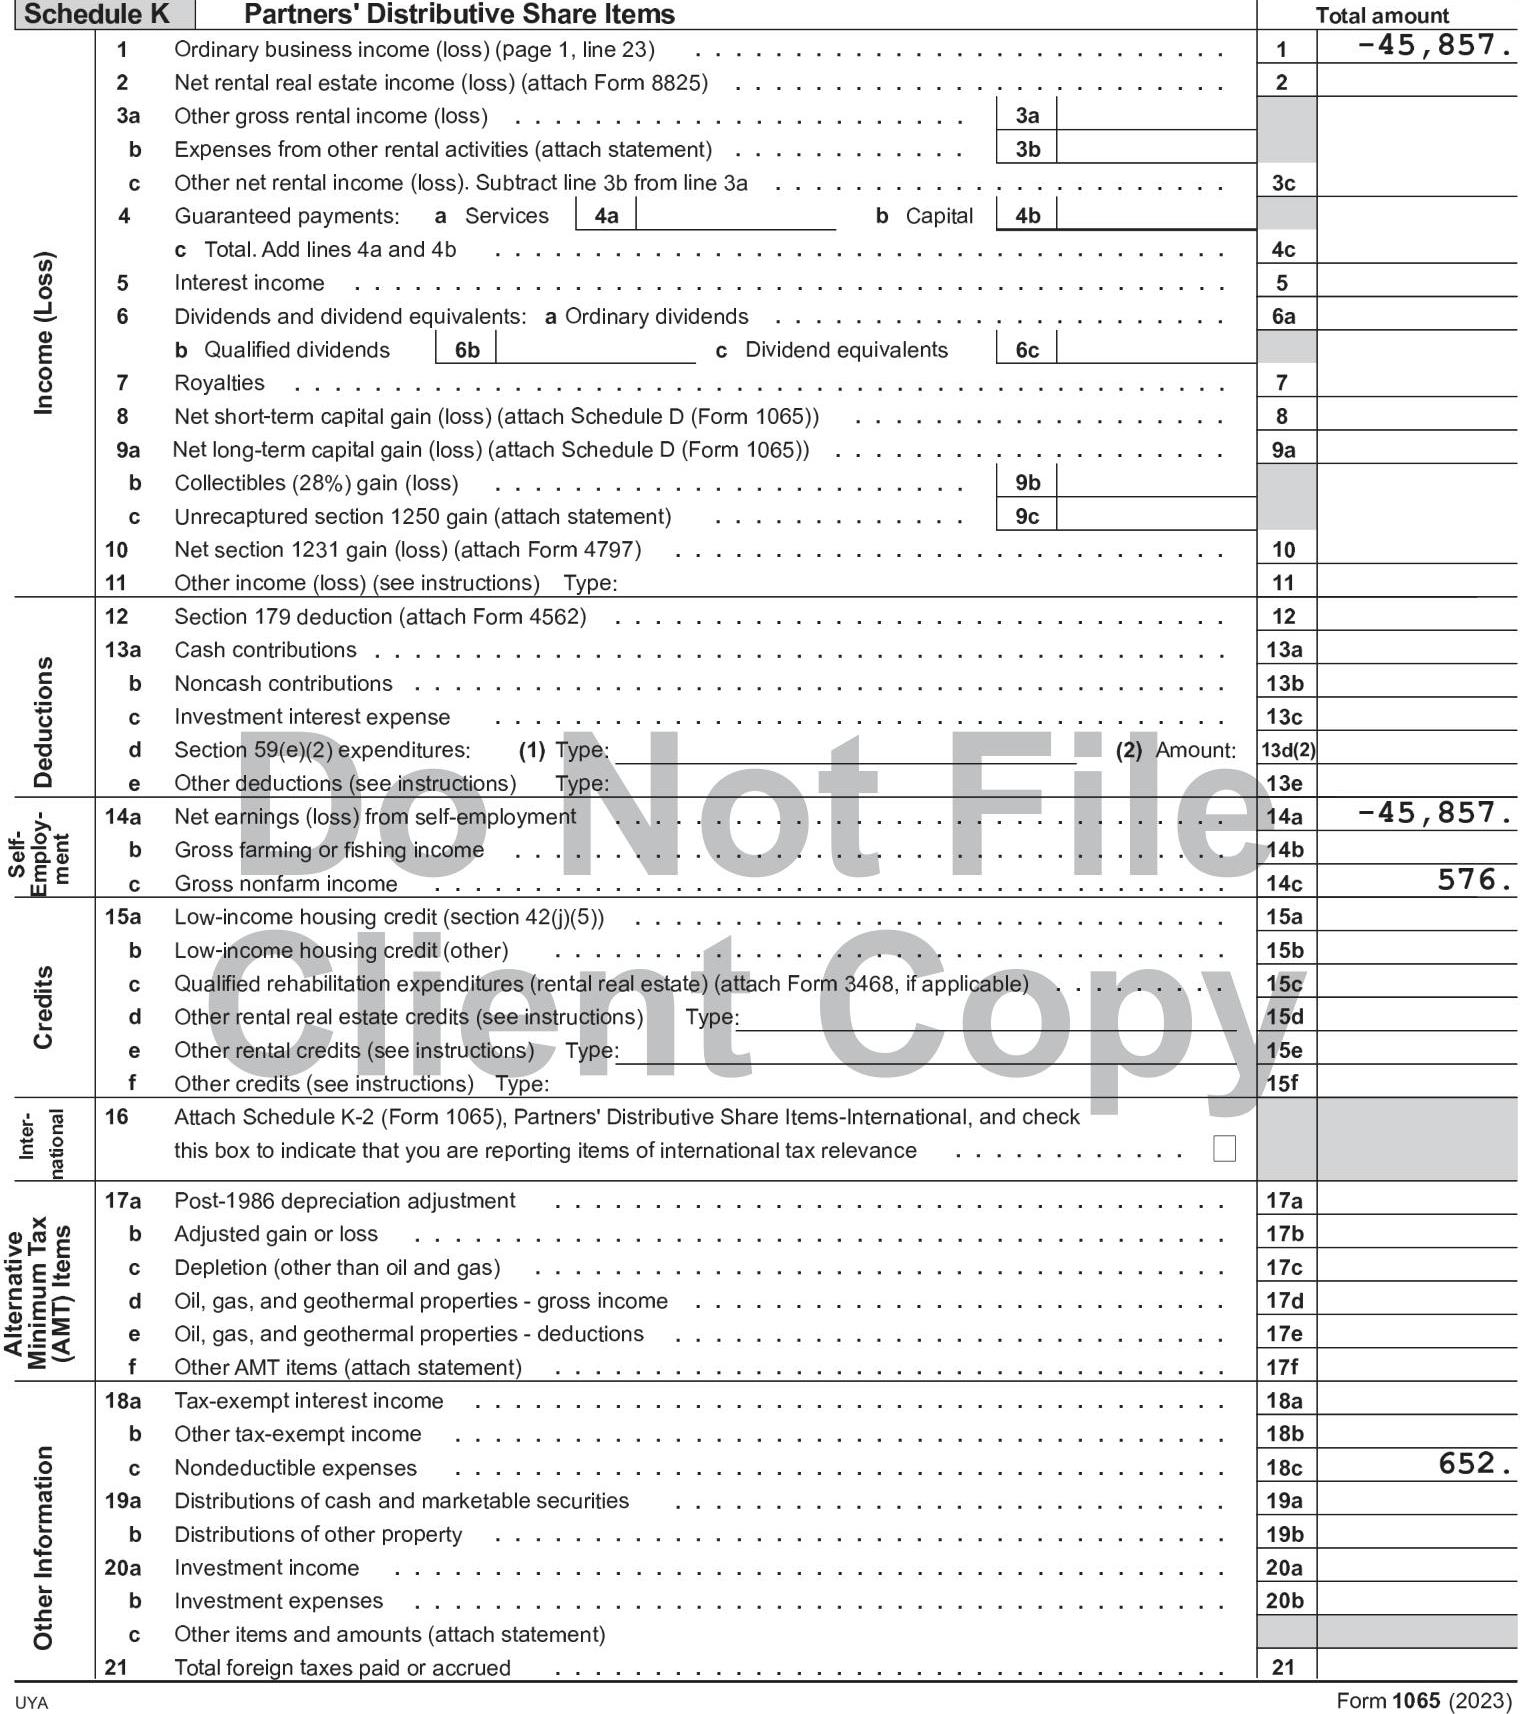

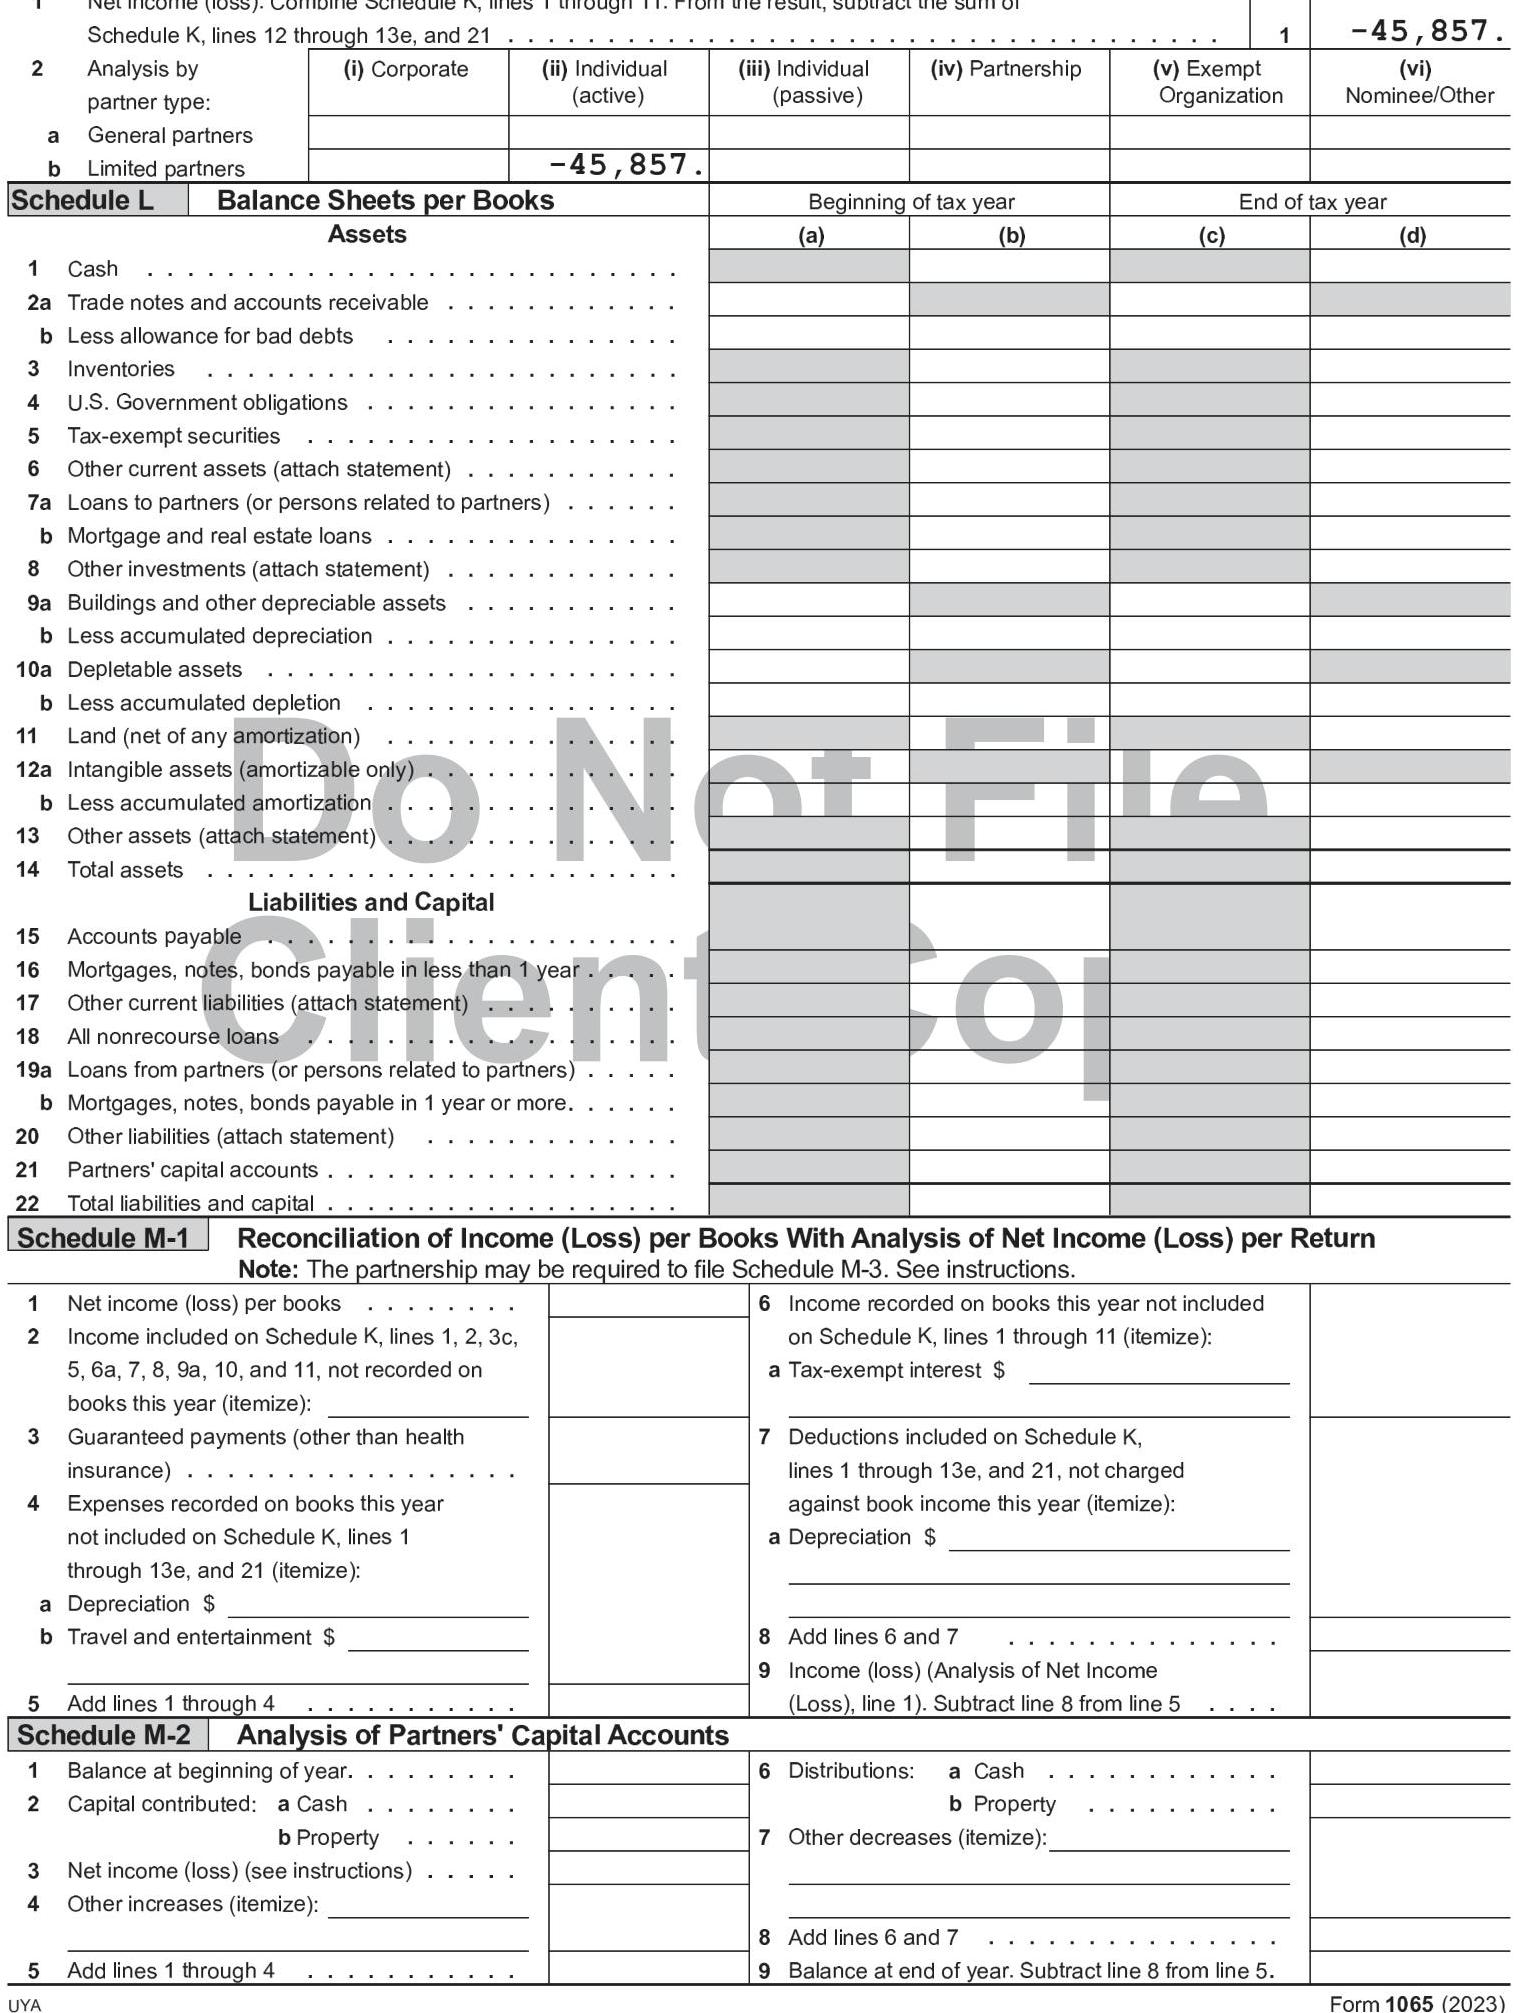

# Cost of Goods Sold 

CHAPTER 1125-A
(Rev. November 2018)
Department of the Treasury
Internal Revenue Service

Attach to Form 1120, 1120-C, 1120-F, 1120S, or 1065.
Go to www.irs.gov/Form1125A for the latest information.

## CARTE BLANCHE INNOVATION INTEGRATED LLC

1 Inventory at beginning of year.
2 Purchases
3 Cost of labor
4 Additional section 263A costs (attach schedule)
5 Other costs (attach schedule)
6 Total. Add lines 1 through 5 .
7 Inventory at end of year
8 Cost of goods sold. Subtract line 7 from line 6. Enter here and on Form 1120, page 1, line 2 or the appropriate line of your tax return. See instructions.

## 9a Check all methods used for valuing closing inventory:

(i) $\square$ Cost
(ii) $\square$ Lower of cost or market
(iii) $\square$ Other (Specify method used and attach explanation.)
b Check if there was a writedown of subnormal goods
c Check if the LIFO inventory method was adopted this tax year for any goods (if checked, attach Form 970)
d If the LIFO inventory method was used for this tax year, enter amount of closing inventory computed under LIFO
e If property is produced or acquired for resale, do the rules of section 263A apply to the entity? See instructions
f Was there any change in determining quantities, cost, or valuations between opening and closing inventory? If
attach explanation.

For Paperwork Reduction Act Notice, see instructions.
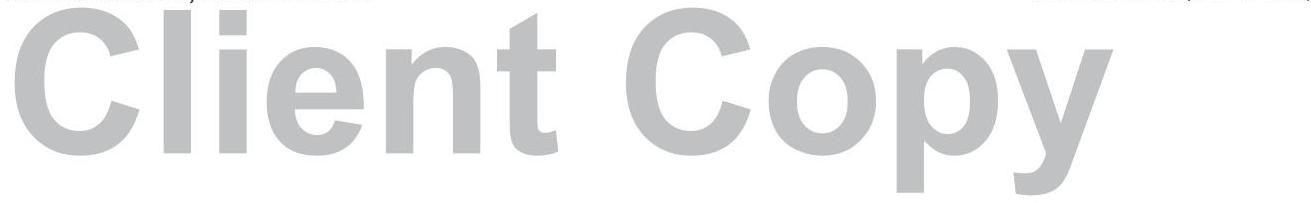

| SCHEDULE B-1 (Form 1065) | Information on Partners Owning 50\% or More of the Partnership Attach to Form 1065. |  |  | OMB No. 1545-0123 |
| :--: | :--: | :--: | :--: | :--: |
| (Rev. August 2019) |  |  |  |  |
| Department of the Treasury | Go to www.irs.gov/Form1065 for the latest information. |  |  |  |
| Name of partnership |  |  | Employer identification number (EIN) |  |
| CARTE BLANCHE INNOVATION INTEGRATED LLC |  |  | $* * * * * 5609$ |  |
| FAP 1 Entities Owning 50\% or More of the Partnership (Form 1065, Schedule B, Question 2a (Question 3a for 2009 through 2017)) |  |  |  |  |
| Complete columns (i) through (v) below for any foreign or domestic corporation, partnership (including any entity treated as a partnership), trust, tax-exempt organization, or any foreign government that owns, directly or indirectly, an interest of $50 \%$ or more in the profit, loss, or capital of the partnership (see instructions). |  |  |  |  |
| (i) Name of Entity | (ii) Employer <br> Identification Number <br> (if any) | (iii) Type of Entity | (iv) <br> Country of Organization | (v) Maximum <br> Percentage Owned <br> in Profit, Loss, or <br> Capital |
|  |  |  |  |  |
|  |  |  |  |  |
|  |  |  |  |  |
|  |  |  |  |  |
| Part II Individuals or Estates Owning 50\% or More of the Partnership (Form 1065, Schedule B, Question 2b (Question 3b for 2009 through 2017)) |  |  |  |  |
| Complete columns (i) through (iv) below for any individual or estate that owns, directly or indirectly, an interest of $50 \%$ or more in the profit, loss, or capital of the partnership (see instructions). |  |  |  |  |
| (i) Name of Individual or Estate | (ii) Identifying Number (if any) | (iii) Country of Citizenship (see instructions) |  | (iv) Maximum Percentage Owned in Profit, Loss, or Capital |
| REHMAN U. RAUF | $* * *-* *-6825$ | United States |  | 50.00 |
| MOHAMMAD DARWISH | $* * *-* *-8879$ | United States |  | 50.00 |
|  |  |  |  |  |
|  |  |  |  |  |
|  |  |  |  |  |
|  |  |  |  |  |
|  |  |  |  |  |
|  |  |  |  |  |

For Paperwork Reduction Act Notice, see the Instructions for Form 1065.
Schedule B-1 (Form 1065) (Rev. 8-2019) UTA

| Schedule K-1 | 2023 |
| :--: | :--: |
| (Form 1065) |  |
| Department of the Treasury |  |
| Internal Revenue Service |  |
| beginning | 2023 ending |

## Partner's Share of Income, Deductions,

Credits, etc.
See separate instructions.

## Part I Information About the Partnership

A Partnership's employer identification number $85-3465609$
B Partnership's name, address, city, state, and ZIP code
CARTE BLANCHE INNOVATION INTEGRATED LLC 1821 W THORNWOOD LANE Mount Prospect, IL 60056

C IRS center where partnership filed return: KANSAS CITY, MO 64999
D Check if this is a publicly traded partnership (PTP)

## Part II Information About the Partner

E Partner's SSN or TIN (Do not use TIN of a disregarded entity. See instructions.) *****-6825

F Name, address, city, state, and ZIP code for partner entered in E. See instructions. REHMAN U RALF 9668 WEXFORD CIR GRANITE BAY, CA 95746

G General partner or LLC member-manager

H1 X Domestic partner Foreign partner H2 If the partner is a disregarded entity (DE), enter the partner's: TIN $\qquad$ Name

I1 What type of entity is this partner? INDIVIDUAL
I2 If this partner is a retirement plan (IRV/SEP/Kings/etc.): Check here
J Partner's share of profit, loss, and capital (see instructions):
Beginning Ending
Profit $\quad 50.0000 \quad \% \quad 50.0000 \quad \%$
Loss $\quad 50.0000 \quad \% \quad 50.0000 \quad \%$
Capital $\quad 50.0000 \quad \% \quad 50.0000 \quad \%$
Check if decrease is due to:
$\square$ Sale or Exchange of partnership interest. See instructions.
K1 Partner's share of liabilities:
Beginning Ending
Nonrecourse . . . $\$ \quad \$$
Qualified nonrecourse financing . . . . $\$ \quad 1,024 \quad \$$
Recourse . . . . $\$$
K2 Check this box if item K1 includes liability amounts from lower-tier partnerships K3 Check if any of the above liability is subject to guarantees or other payment obligations by the partner. See instructions

| L Partner's Capital Account Analysis |  |  |  |
| :--: | :--: | :--: | :--: |
| Beginning capital account | $\$ \quad \$$ |  |  |
| Capital contributed during the year | $\$ \quad \$$ |  |  |
| Current year net income (loss) | $\$ \quad \$$ |  |  |
| Other increase (decrease) (attach explanation) | $\$$ |  |  |
| Withdrawals and distributions | $\$ \quad \$$ |  |  |
| Ending capital account | $\$ \quad \$$ |  |  |
| M Did the partner contribute property with a built-in gain (loss)? |  |  |  |
| Yes $\quad$ No | If "Yes," attach statement. See instructions. |  |  |
| N Partner's Share of Net Unrecognized Section 794(c) Gain or (Loss) |  |  |  |
| Beginning | $\$ \quad \$$ |  |  |
| Ending | $\$ \quad \$$ |  |  |


| Final K-1 | Amerded K-1 | OMS No. 1545-0123 |
| :--: | :--: | :--: |
| Part III Partner's Share of Current Year Income, Deductions, Credits, and Other Items |  |  |
| 1 Ordinary business income (loss) | 14 | Self-employment earnings (loss) |
| * -22,929. | A | $-22,929$. |
| 2 Net rental real estate income (loss) |  |  |
|  | C | 288. |
| 3 Other net rental income (loss) | 15 | Credits |
| 4 a Guaranteed payments for services |  |  |
| 4b Guaranteed payments for capital | 16 | Schedule K-3 is attached if checked |
| 4c Total guaranteed payments | 17 | Alternative minimum tax (AMT) items |
| 5 Interest income |  |  |
| 6a Ordinary dividends |  |  |
| 6b Qualified dividends | 18 | Tax-exempt income and nondeductible expenses |
| 6c Dividend equivalents |  | 326. |
| 7 Realities |  |  |
| 8 Net short-term capital gain (loss) |  |  |
| 9a Net long-term capital gain (loss) |  |  |
| 9b Collectibilis (20\%) gain (loss) | 20 | Other information |
| 9c Unecaprared section 1250 gain | 21 | STMT |
| 10 Net section 1231 gain (loss) |  |  |
| 11 Other income (loss) |  |  |
| 12 Section 179 deduction | 21 | Foreign taxes paid or accrued |
| 13 Other deductions |  |  |
| 22 X More than one activity for at-risk purposes* |  |  |
| 23 More than one activity for passive activity purposes* |  |  |
| "See attached statement for additional information. |  |  |

Statement A - QBI Pass-through Entity Reporting
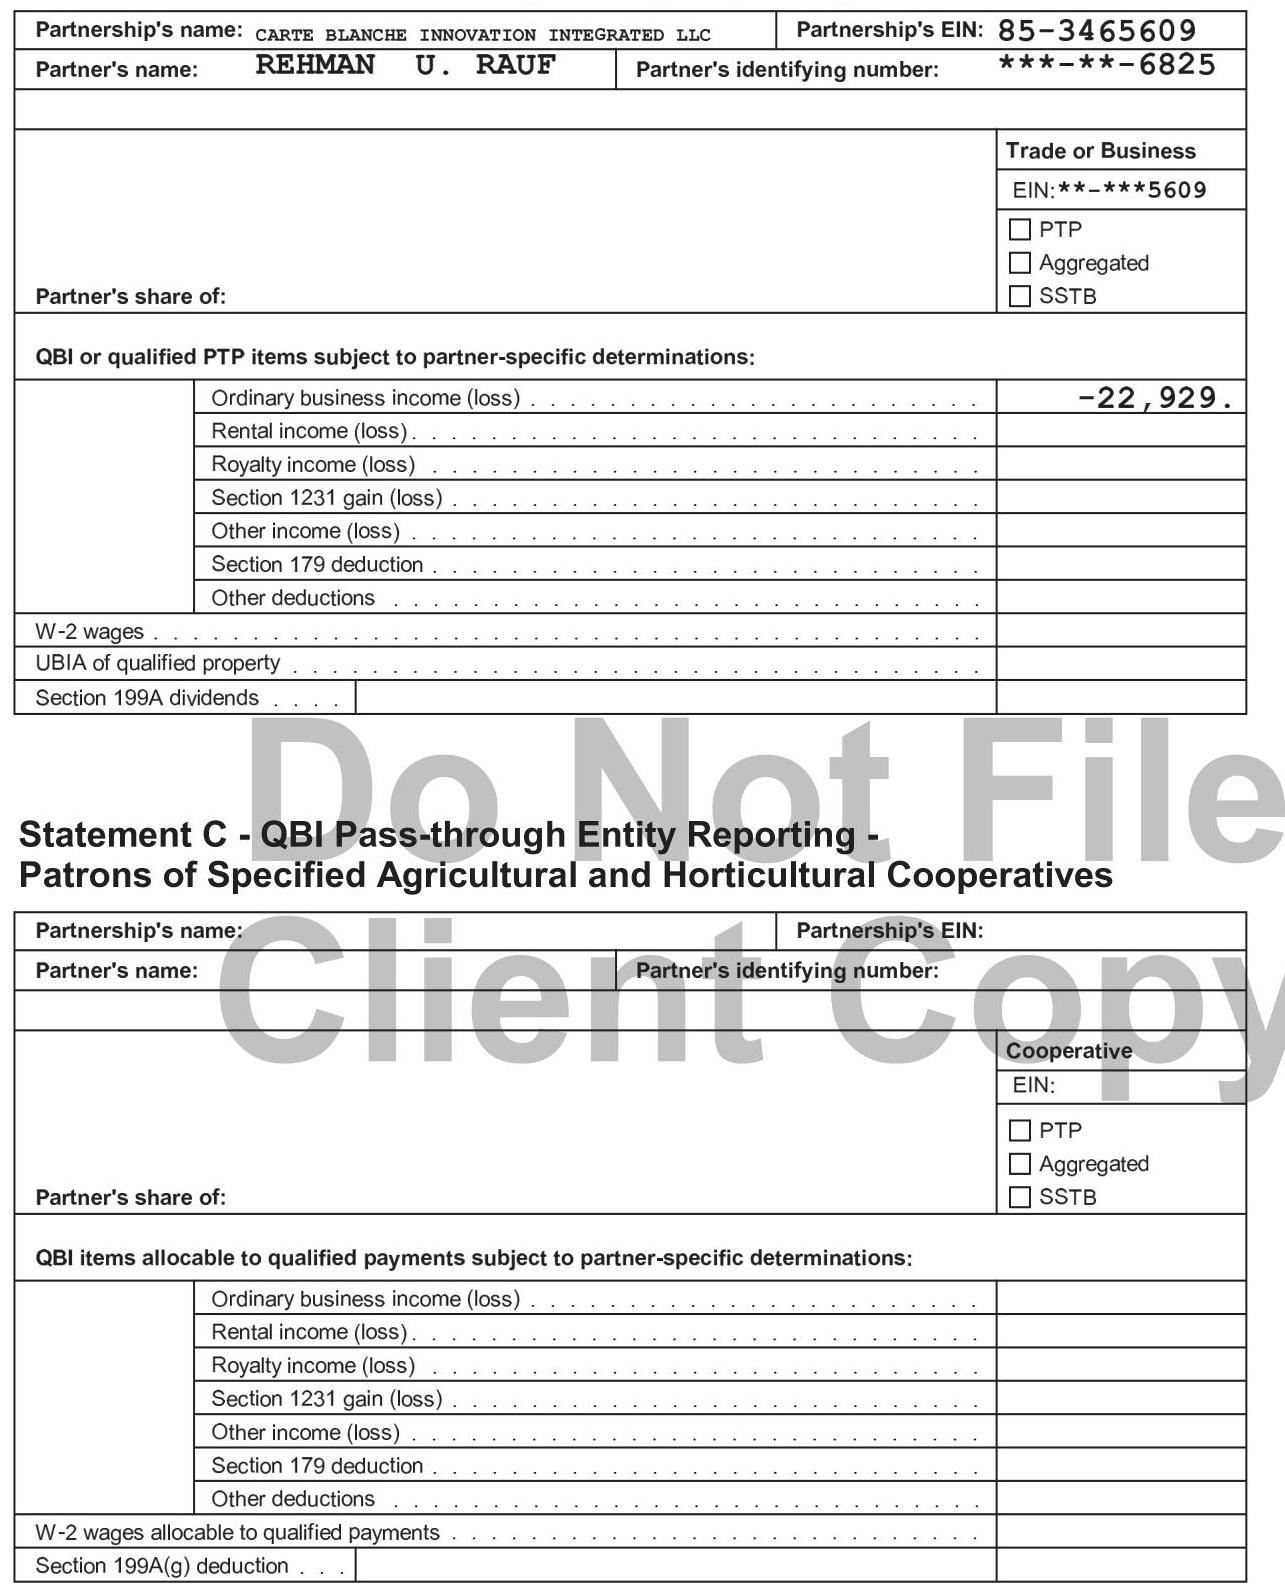

# Schedule K-1 - Supplemental Information 

Supporting Statement for Schedule K-1

Partnership: CARTE BLANCHE INNOVATION
INTEGRATED LLC
Partner: REHMAN U. RAUF
Description
Nonpassive ordinary income included in line 1

EIN: ${ }^{* *} * * * 5609$
ID ******-6825
$\begin{array}{ll}\text { Amount } \\ \text { $-22,929 .\end{array}$

| Schedule K-1 | 2023 |
| :--: | :--: |
| (Form 1065) |  |
| Department of the Treasury |  |
| Internal Revenue Service |  |
| beginning | 2023 ending |

## Partner's Share of Income, Deductions,

Credits, etc.
See separate instructions.

## Part I Information About the Partnership

A Partnership's employer identification number $85-3465609$
B Partnership's name, address, city, state, and ZIP code
CARTE BLANCHE INNOVATION INTEGRATED LLC 1821 W THORNWOOD LANE Mount Prospect, IL 60056

C IRS center where partnership filed return: KANSAS CITY, MO 64999
D Check if this is a publicly traded partnership (PTP)

## Part II Information About the Partner

E Partner's SSN or TIN (Do not use TIN of a disregarded entity. See instructions.) *****-8879

F Name, address: city, state, and ZIP code for partner entered in E. See instructions. MOHAMMAD DARWISH 1821 W THORNWOOD LANE Mount Prospect, IL 60056

G General partner or LLC member-manager

K Limited partner or other LLC member
H1 X Domestic partner Foreign partner H2 If the partner is a disregarded entity (DE), enter the partner's: TIN

Name

I1 What type of entity is this partner? INDIVIDUAL
I2 If this partner is a retesment plan (INV/SEP/Kingshote, I) check here
J Partner's share of profit, loss, and capital (see instructions):
Beginning Ending
Profit $\quad 50.0000 \quad \% \quad 50.0000 \quad \%$
Loss $\quad 50.0000 \quad \% \quad 50.0000 \quad \%$
Capital $\quad 50.0000 \quad \% \quad 50.0000 \quad \%$

Check if decrease is due to:
$\square$ Sale or Exchange of partnership interest. See instructions.
K1 Partner's share of liabilities:
Beginning Ending
Nonrecourse . . . . $\$ \quad \$$
Qualified nonrecourse financing . . . . . $\$ \quad 1,024 \quad \$$
Recourse . . . . $\$$ $\$ \quad \$
K2 Check this box if item K1 includes liability amounts from lower-tier partnerships
K3 Check if any of the above liability is subject to guarantees or other payment obligations by the partner. See instructions

| L | Partner's Capital Account Analysis |
| :--: | :--: |
|  | Beginning capital account |
|  | Capital contributed during the year |
|  | Current year net income (loss) |
| N | Other increase (decrease) (attach explanation) |
|  | Withdrawals and distributions |
|  | Ending capital account |
| M | Did the partner contribute property with a built-in gain (loss)? |
|  | Yes $\quad$ No If "Yes," attach statement. See instructions. |
| N | Partner's Share of Net Unrecognized Section 794(c) Gain or (Loss) |
|  | Beginning |
|  | Ending |


| Final K-1 |  |  |  |  | Amended K-1 |  |  |  | OMS No. 1545-0123 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| Part III | Partner's Share of Current Year Income, Deductions, Credits, and Other Items |  |  |  |  |  |  |  |  |
| 1 | Ordinary business income (loss) | 14 | Self-employment earnings (loss) |  |  |  |  |  |  |
| * | $-22,928$. | A | $-22,928$. |  |  |  |  |  |  |
| 2 | Net rental real estate income (loss) |  |  |  |  | C |  | 288. |  |
| 3 | Other net rental income (loss) | 15 | Credits |  |  |  |  |  |  |
| 4 a | Guaranteed payments for services |  |  |  |  |  |  |  |  |
| 4b | Guaranteed payments for capital | 16 | Schedule K-3 is attached if checked |  |  |  |  |  |  |
| 4c | Total guaranteed payments | 17 | Alternative minimum tax (AMT) items |  |  |  |  |  |  |
| 5 | Interest income |  |  |  |  |  |  |  |  |
| 6a | Ordinary dividends |  |  |  |  |  |  |  |  |
| 6b | Qualified dividends | 18 | Tax-exempt income and nondeductible expenses |  |  |  |  |  |  |
| 6c | Dividend equivalents |  |  |  |  | C |  | 326. |  |
| 7 | Realities |  |  |  |  |  |  |  |  |
| 8 | Net short-term capital gain (loss) |  |  |  |  |  |  |  |  |
| 9a | Net long-term capital gain (loss) |  |  |  |  |  |  |  |  |
| 9b | Collectibilis (20\%) gain (loss) |  |  |  |  | 28 | Other information |  |  |
| 9c | Unecognized section 1250 gain |  |  |  |  | 29 |  |  |  |
| 10 | Net section 1231 gain (loss) |  |  |  |  |  |  |  |  |
| 11 | Other income (loss) |  |  |  |  |  |  |  |  |
| 12 | Section 179 deduction |  |  |  |  | 21 | Foreign taxes paid or accrued |  |  |
| 13 | Other deductions |  |  |  |  |  |  |  |  |
| 22 | X More than one activity for at-risk purposes* |  |  |  |  |  |  |  |  |
| 23 | More than one activity for passive activity purposes* |  |  |  |  |  |  |  |  |
| *See attached statement for additional information. |  |  |  |  |  |  |  |  |  |

Statement A - QBI Pass-through Entity Reporting
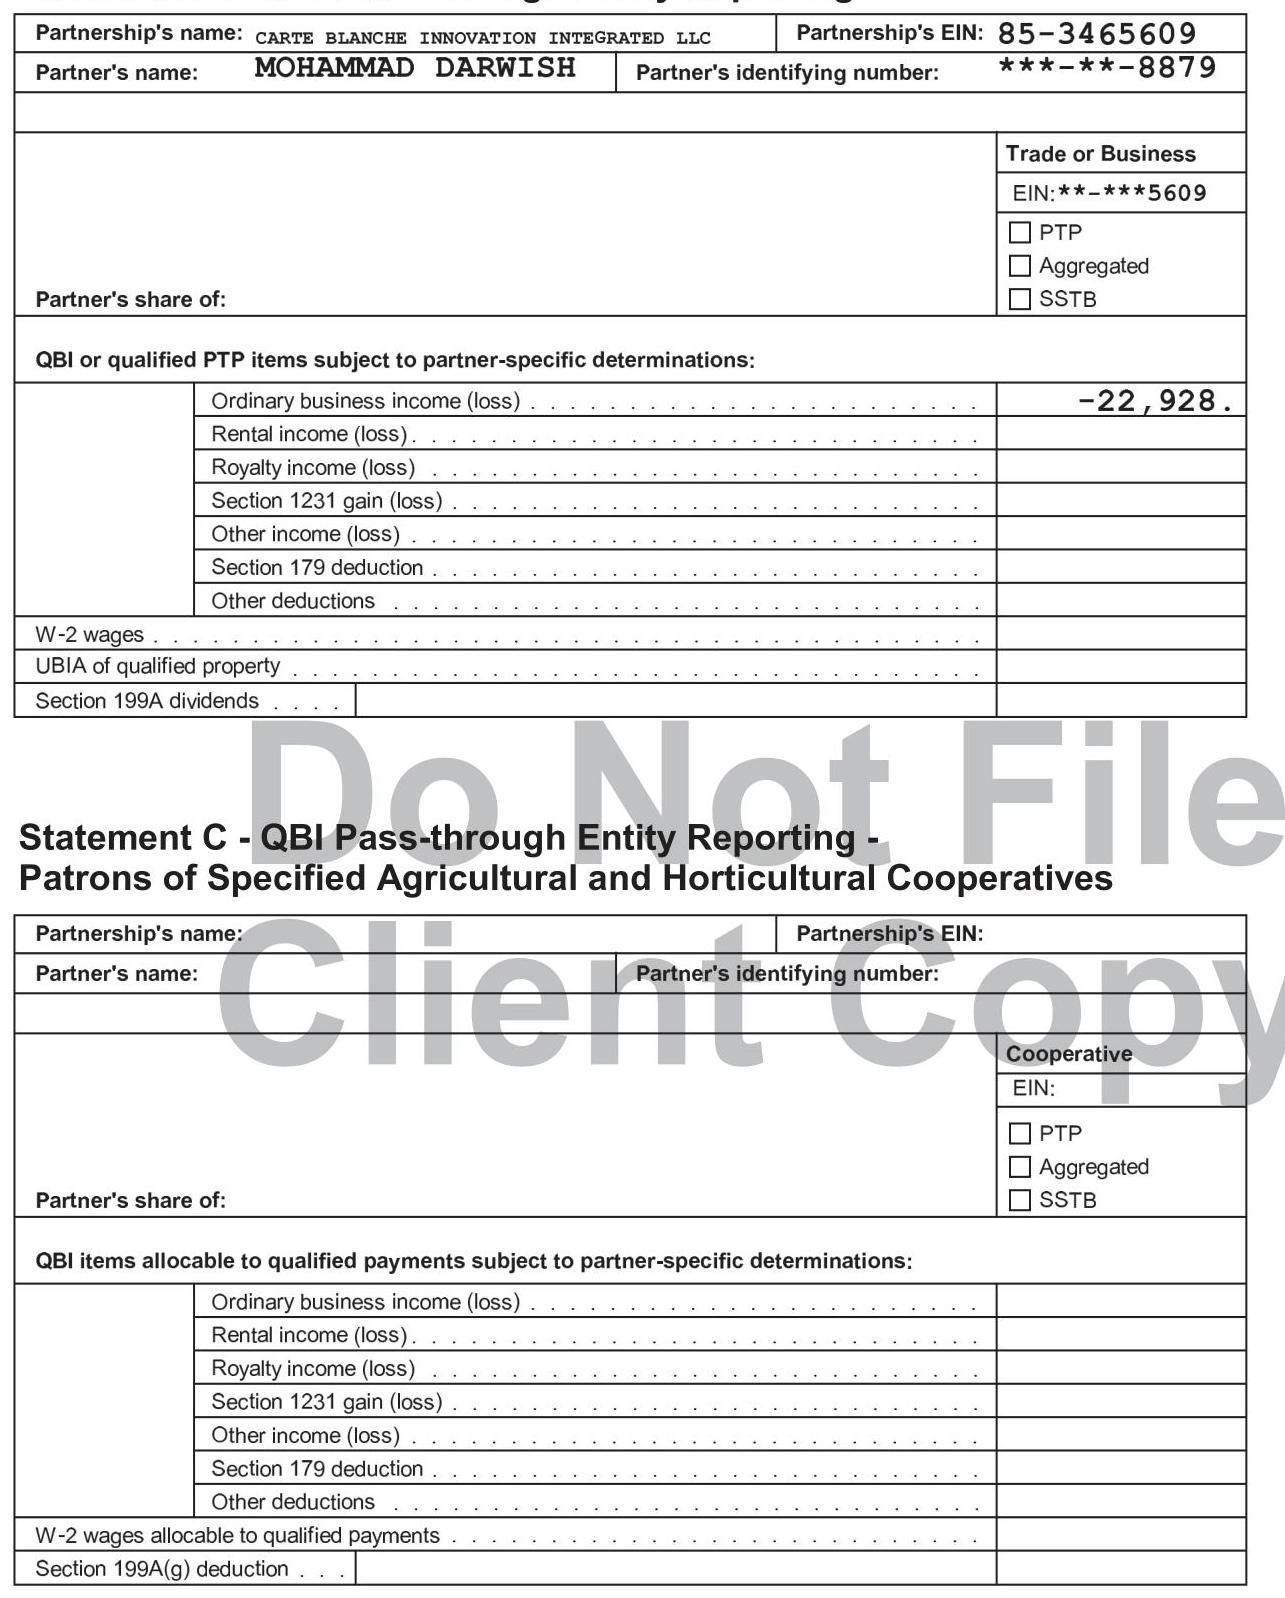

# Schedule K-1 - Supplemental Information 

Supporting Statement for Schedule K-1

Partnership: CARTE BLANCHE INNOVATION
INTEGRATED LLC
Partner: MOHAMMAD DARWISH
Description
Nonpassive ordinary income included in line 1

EIN: ${ }^{* *}-{ }^{* * *} 5609$
ID ***-**.8879
$\begin{array}{ll}\text { Amount } & \\ \text { $-22,928 .}\end{array}$

2023 Other Deductions - Supporting Details for Form 1065, Line 21

| Name(s) shown on return |  |
| :--: | :--: |
| CARTE BLANCHE INNOVATION INTEGRATED LLC | Employer identifying number $* *--* * * 5609$ |
| 1. Bank fees | 1 |
| 2. Credit card convenience fees | 2 |
| 3. Professional dues and subscriptions | 3 |
| 4. Deductible non-entertainment meals expense subject to limits | 4 |
| 5. Travel and non-entertainment meals expense not subject to limits | 5 |
| 6. Business Development | 6 |
| 7. Employees Development \& Growth | 7 |
| 8. Upwork Project Fees | 8 |
| 9. Upwork Service Fees | 9 |
| 10. Events and Booth Development | 10 |
| 11. Software and Productivity Subscriptions | 11 |
| 12. | 12 |
| 13. | 13 |
| 14. | 14 |
| 15. | 15 |
| 16. | 16 |
| 17. | 17 |
| 18. | 18 |
| 19. | 19 |
| 20. | 20 |
| 21. | 21 |
| 22. | 22 |
| 23. | 23 |
| 24. | 24 |
| 25. | 25 |
| 26. | 26 |
| 27. | 27 |
| 28. | 28 |
| 29. | 29 |
| 30. | 30 |
| 31. | 31 |
| 32. | 32 |
| 33. | 33 |
| 34. | 34 |
| 35. | 35 |
| 36. | 36 |
| 37. | 37 |
| 38. | 38 |
| 39. | 39 |
| 40. | 40 |
| 41. | 41 |
| 42. | 42 |
| 43. | 43 |
| 44. | 44 |
| 45. | 45 |
| 46. | 46 |
| 47. | 47 |
| 48. | 48 |
| 49. | 49 |
| 50. | 50 |
| 51. | 51 |
| 52. | 52 |
| 53. | 53 |
| Total Other Deductions | 46,433 |

Statement A - QBI Pass-through Entity Reporting
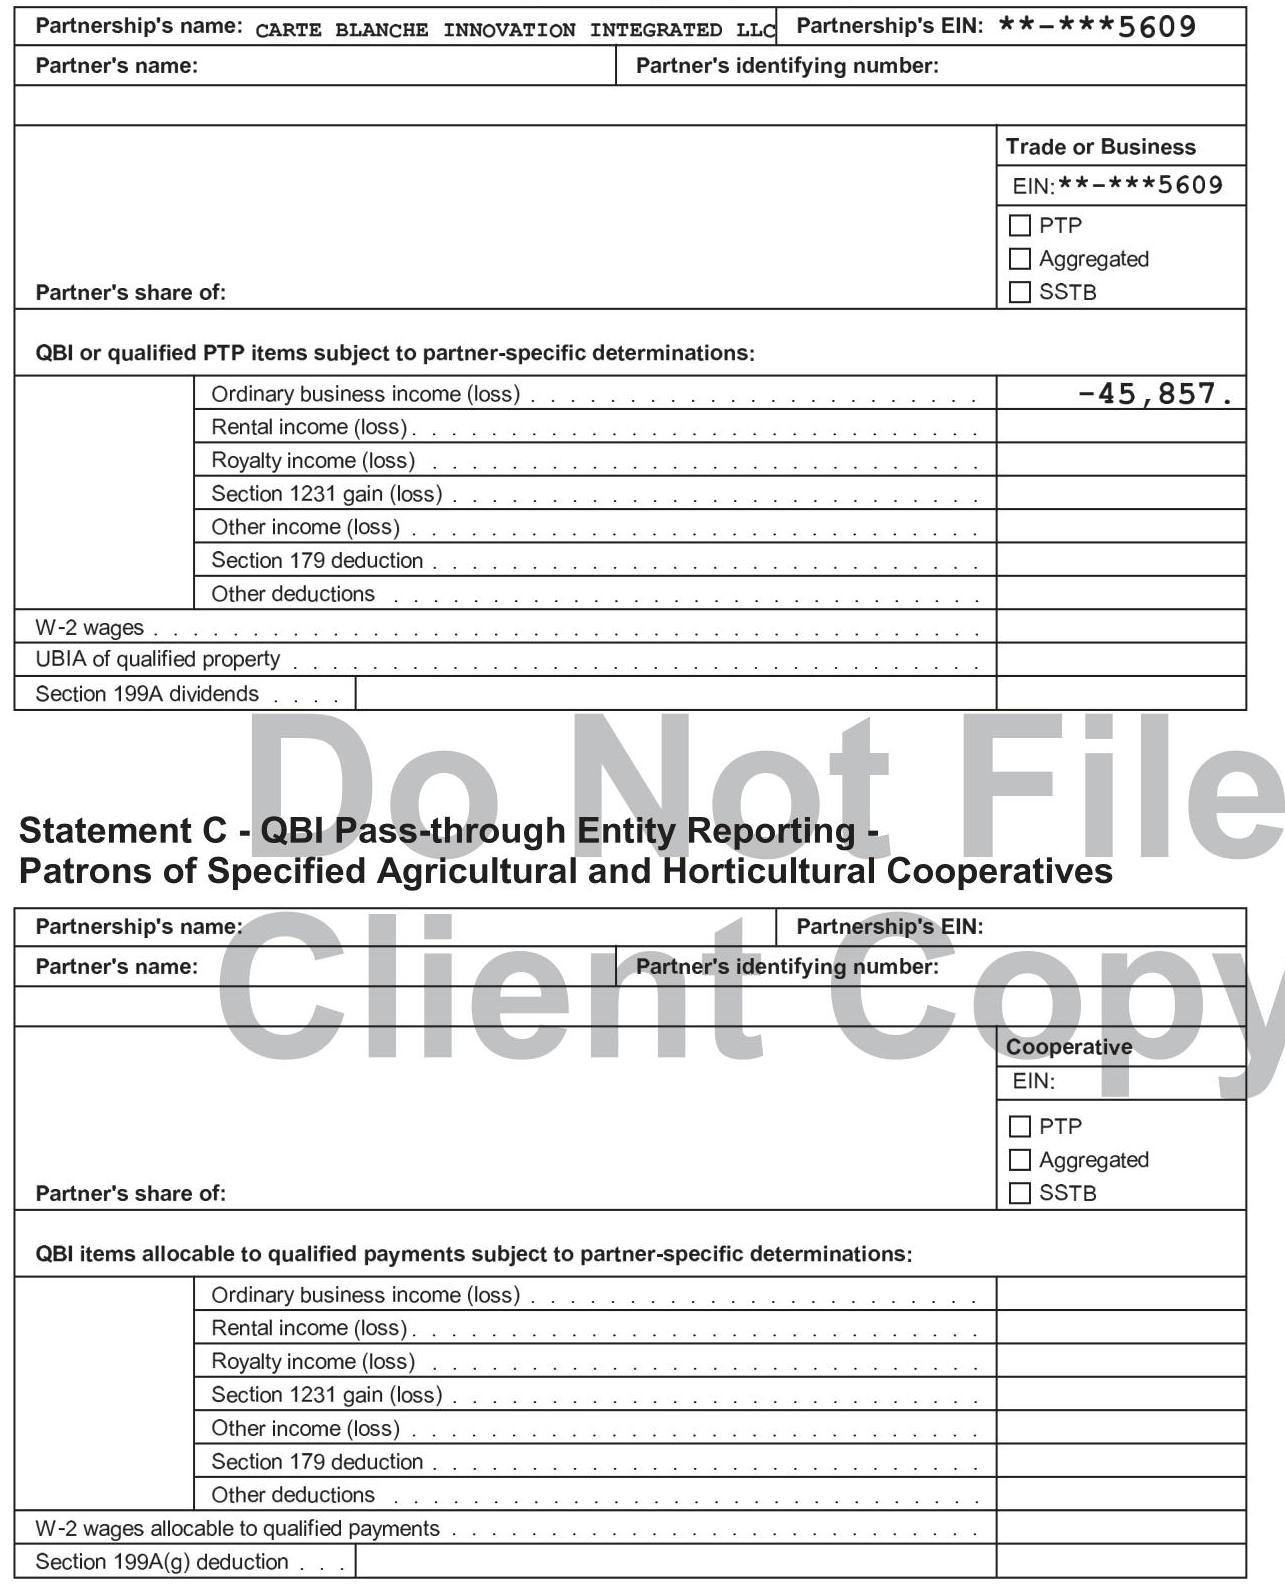

# 2023 Form IL-1065 Partnership Replacement Tax Return 

See "When should I file?" in the Form IL-1065 instructions for a list of due dates.
If this return is not for calendar year 2023, enter your fiscal tax year here.
Tax year beginning month day year month day year
This form is for tax years ending on or after December 31, 2023, and before December 31, 2024.
For all other situations, see instructions to determine the correct form to use.

## Step 1: Identify your partnership

A Enter your complete legal business name.
If you have a name change, check this box.
Name CARTE BLANCHE INNOVATION INTEGRATED LLC
B Enter your mailing address.
C:O: MOHAMMAD DARWISH
1821 W THORNWOOD LANE
Mailing address:
City: Mount Prospect
State: IL ZIP: 60056

C If this is the first or final return, check the applicable box(es).
First return
Final return (Enter the date of termination.
D If this is a final return because you sold this business, enter the date sold (mm dd yyyy) $\qquad$ and the new owner's FEIN.

E Apportionment Formulas Check the appropriate box or boxes and see Apportionment Formula instructions.

Financial organizations
Transportation companies
F
Check this box if you are:
classified as an investment partnership
classified as a publicly-traded partnership
G Check this box if you made an IRC § 761 election.
H Check this box if you are a 52/53 week filer.
I Check this box if you elected to file and pay Pass-through Entity (PTE) Tax. (See instructions.)
J If you are paying Pass-through Entity (PTE) Tax and you annualized your income on Form IL-2220, check this box and attach Form IL-2220.

## E Enter your federal employer identification number (FEIN). <br> $* * \rightarrow * * 5609$

L Check this box if you are a member of a unitary business group and are included on a Schedule UB, Combined Apportionment for Unitary Business Group. Enter the FEIN of the member who prepared the Schedule UB and attach it to this return.

M Enter your North American Industry Classification System (NAICS) Code. See instructions. 541700
N Enter the city, state, and zip code where your accounting records are kept. (Use the two-letter postal abbreviation, e.g., IL, GA, etc.)
Mount Prospect, IL 60056
City
State
ZIP
O If you are making the business income election to treat all nonbusiness income as business income, check this box and enter zero on Lines 36 and 44.
P If you have completed the following, check the box and attach the federal form(s) to this return.
Federal Form 8806
Federal Sch. M-3,
Part II, Line 10
Q Check this box if you attached Form IL-4562.
R Check this box if you attached Illinois Schedule M (for businesses).
S Check this box if you attached Schedule 80/20
T Check this box if you attached Schedule 1299-A.
U Check this box if your business activity is protected under Public Law 86-272.
V Check this box if you attached the Subgroup Schedule.

## Step 2: Figure your ordinary income or loss

1 Ordinary income or loss, or equivalent from federal Schedule K.
2 Net income or loss from all rental real estate activities.
3 Net income or loss from other rental activities.
4 Portfolio income or loss.
5 Net IRC Section 1231 gain or loss.
6 All other items of income or loss that were not included in the computation of income or loss on Page 1 of U.S. Form 1065. See instructions. Identify:
7 Add Lines 1 through 6. This is your ordinary income or loss.

## Step 3: Figure your unmodified base income or loss

8 Charitable contributions.
9 Expense deduction under IRC Section 179.
10 Interest on investment indebtedness.
11 All other items of expense that were not deducted in the computation of ordinary income or loss on Page 1 of U.S. Form 1065. See instructions. Identify:
12 Add Lines 8 through 11.
13 Subtract Line 12 from Line 7. This amount is your total unmodified base income or loss.

|  |  |  |  |  |
| :--: | :--: | :--: | :--: | :--: |
| IL-1065 (R-12/23) |  |  |  |  |
|  |  |  |  |  |

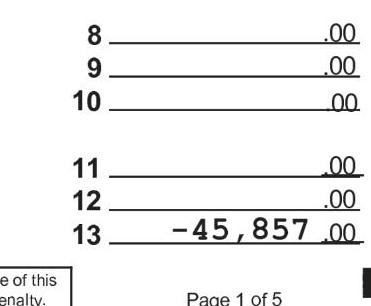

# Step 4: Figure your income or loss 

14 Enter your unmodified base income or loss from Line 13.
15 State, municipal, and other interest income excluded from Line 14.
16 Illinois taxes deducted in arriving at Line 14. See instructions.
17 Illinois Special Depreciation addition. Attach Form IL-4562.
18 Related-Party Expenses addition. Attach Schedule 80/20.
19 Distributive share of additions. Attach Schedule(s) K-1-P or K-1-T.
20 Guaranteed payments to partners from U.S. Form 1065.
21 The amount of loss distributable to a partner subject to replacement tax. Attach Schedule B.
22 Other additions. Attach Illinois Schedule M (for businesses).
23 Add Lines 14 through 22.This amount is your income or loss.

## Step 5: Figure your base income or loss

24 Interest income from U.S.Treasury or other exempt federal obligations.
25 August 1,1969, valuation limitation amount. Attach Schedule F.
26 Personal service income or reasonable allowance for compensation of partners.
27 Share of income distributable to a partner subject to replacement tax. Attach Schedule B.
28 River Edge Redevelopment Zone Dividend subtraction. Attach Schedule 1299-A.
29 High Impact Business Dividend subtraction. Attach Schedule 1299-A.
30 Illinois Special Depreciation subtraction. Attach Form IL-4562.
31 Related-Party Expenses subtraction. Attach Schedule 80/20.
32 Distributive share of subtractions. Attach Schedule(s) K-1-P or K-1-T.
33 Other subtractions. Attach Schedule M (for businesses).
34 Total subtractions. Add Lines 24 through 33.
35 Base income or loss. Subtract Line 34 from Line 23.

| 24 | 00 |
| :--: | :--: |
| 25 | 00 |
| 26 | 00 |
| 27 | 00 |
| 28 | 00 |
| 29 | 00 |
| 30 | 00 |
| 31 | 00 |
| 32 | 00 |
| 33 | 00 |
| 34 | 00 |
| 35 | $-45,857$ |

A If the amount on Line 35 is derived inside Illinois only, check this box and enter the amount from Step 5, Line 35 on Step 7, Line 47.You may not complete Step 6. (You must leave Step 6, Lines 36 through 46 blank.) Note $\rightarrow$ If you are a unitary filer, do not check this box. Check the box on Line B and complete Step 6.
B If any portion of the amount on Line 35 is derived outside Illinois, or you are a unitary filer, check this box and completeall lines of Step 6. (Do not leave Lines 40 through 42 blank.) See instructions.

Step 6: Figure your income allocable to Illinois (Complete only if you checked the box on Line B, above.)
36 Nonbusiness income or loss. Attach Schedule NB.
37 Business income or loss included in Line 35 from non-unitary partnerships, partnerships included on a Schedule UB, S corporations, trusts, or estates. See instructions.
38 Add Lines 36 and 37.
39 Business income or loss. Subtract Line 38 from Line 35.
40 Total sales everywhere. This amount cannot be negative.
41 Total sales inside Illinois. This amount cannot be negative.
42 Apportionment factor. Divide Line 41 by Line 40. Round to six decimal places.
43 Business income or loss apportionable to Illinois. Multiply Line 39 by Line 42.
44 Nonbusiness income or loss allocable to Illinois. Attach Schedule NB.
45 Business income or loss apportionable to Illinois from non-unitary partnerships, partnerships included on a Schedule UB, S corporations, trusts, or estates. See instructions.
46 Base income or loss allocable to Illinois. Add Lines 43 through 45.

| 36 | 00 |
| :--: | :--: |
| 37 | 00 |
| 38 | 00 |
| 39 | 00 |
| 40 | 00 |
| 41 | 00 |
| 42 |  |
| 43 | 00 |
| 44 | 00 |
| 45 | 00 |
| 46 | 00 |

# Step 7: Figure your net income 

47 Base income or net loss from Step 5, Line 35, or Step 6, Line 46.
48 Illinois net loss deduction. If Line 47 is zero or a negative amount, enter zero. Attach Schedule NLD. Check this box and attach a detailed statement if you have merged losses.
49 Income after NLD. Subtract Line 48 from Line 47.
50 Enter the amount from Step 5, Line 35.
51 Divide Line 47 by Line 50. Round the result to six decimal places. This figure cannot be greater than one.
52 Exemption allowance. See instructions before completing.
53 Net income. Subtract Line 52 from Line 49.
Step 8: Figure the taxes, pass-through withholding, and penalty you owe
54 Replacement tax. Multiply Line 53 by $1.5 \%(.015)$.
55 Recapture of investment credits. Attach Schedule 4255.
56 Replacement tax before investment credits. Add Lines 54 and 55.
57 Investment credits. Attach Form IL-477.
58 Net replacement tax. Subtract Line 57 from Line 56. If the amount is negative, enter zero.
59 Withholding. See instructions.
a Pass-through withholding you owe on behalf of your members. Enter the amount from Schedule B, Section A, Line 5. Attach Schedule B.
b Investment partnership withholding.
Total Withholding. Add Lines 59a and 59b.
60 Pass-through entity income. See instructions.
61 Pass-through entity tax. Multiply Line 60 by $4.95 \%(.0495)$.
62 Total net replacement tax, pass-through withholding, and pass-through entity tax you owe. Add Lines 58, 59, and 61.
63 Underpayment of estimated tax penalty from Form IL-2220. See instructions.
64 Total taxes, withholding, entity tax, and penalty. Add Lines 62 and 63.
Step 9: Figure your refund or balance due
65 Payments. See instructions.
a Credits from previous overpayments.
b Total payments made before the date this return is filed.
c Pass-through withholding reported to you.
Attach Schedule(s) K-1-P or K-1-T.
d Illinois income tax withholding. Attach Form(s) W-2G.
66 Total payments. Add Lines 65a through 65d.
67 Overpayment. If Line 66 is greater than Line 64, subtract Line 64 from Line 66.
68 Amount to be credited forward. See instructions.
Check this box and attach a detailed statement if this carryforward is going to a different FEIN.
69 Refund. Subtract Line 68 from Line 67. This is the amount to be refunded.
70
Complete to direct deposit your refund
Routing Number $\square$ Checking or $\quad$ Savings

Account Number
71 Tax Due. If Line 64 is greater than Line 66, subtract Line 66 from Line 64.This is the amount you owe.
Special Note: Enter the amount of your payment on the top of Page 1 in the space provided.

Step 10: Sign below - Under penalties of perjury, I state that I have examined this return and, to the best of my knowledge, it is true, correct, and complete.
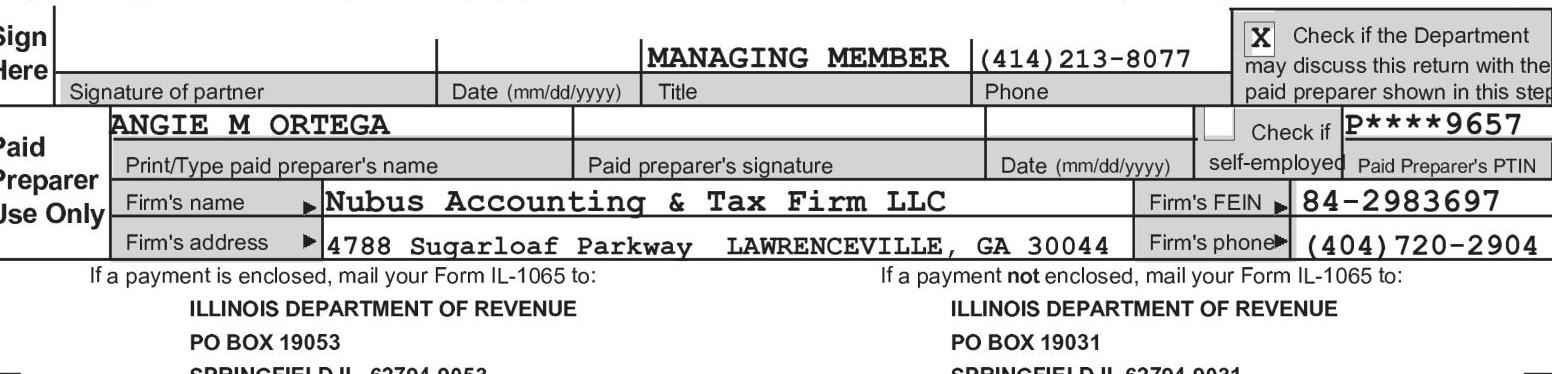

# CARTE BLANCHE INNOVATION INTEGRATED 

## $* * * * * 5609$

Enter your name as shown on your Form IL-1065 or Form IL-1120-ST.
Enter your federal employer identification number (FEIN).

## Read this information first

- You must read the Schedule B instructions and complete Schedule(s) K-1-P and Schedule(s) K-1-P(3) before completing this schedule.
- $\quad$ You must complete Section B of Schedule B and provide all the required information for your partners or shareholders before completing Section A of Schedule B.
Note $\rightarrow$ Failure to follow these instructions may delay the processing of your return or result in you receiving further correspondence from the Illinois Department of Revenue. You may also be required to submit further information to support your filing.


## Section A: Total members' information (from Schedule(s) K-1-P and Schedule B, Section B)

STOP Before completing this section you must first complete Schedule(s) K-1-P, Schedule(s) K-1-P(3) and Schedule B, Section B.You will use the amounts from those schedules when completing this section.

## Totals for resident and nonresident partners or shareholders (from Schedule(s) K-1-P and Schedule B, Section B)

1 Enter the total of all nonbusiness income or loss you reported on Schedule(s) K-1-P for your members. See instructions.

2 Enter the total of all income and replacement tax credits you reported on Schedule(s) K-1-P for your members. See instructions.
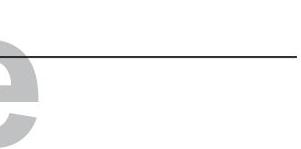

3 Add the amounts shown on Schedule B, Section B, Line E for all partners or shareholders on all pages for which you have checked the box indicating the entity is subject to Illinois replacement tax or an ESOP. Enter the total here. See instructions.

Totals for nonresident partners or shareholders only (from Schedule B, Section B)
4 Enter the total pass-through withholding you reported on all pages of your Schedule B, Section B, Line J for your
a. nonresident individual members. See instructions.

4a $\qquad$
b. nonresident estate members. See instructions.

4b $\qquad$
c. partnership and S corporation members. See instructions.

4c $\qquad$
d. nonresident trust members. See instructions.

4d $\qquad$
e. C corporation members. See instructions.

4e $\qquad$

5 Add Line 4a through Line 4e.This is the total pass-through withholding you owe on behalf of all your nonresident partners or shareholders. This amount should match the total amount from Schedule B, Section B, Line J for all nonresident partners or shareholders on all pages. Enter the total here and on Form IL-1065 (Form IL-1065-X), Line 59a, or Form IL-1120-ST (Form IL-1120-ST-X), Line 59. See instructions.

6 Enter the total pass-through entity tax credit paid on all pages of Schedule B, Section B, Line K.

7 Enter the total pass-through entity tax credit received and distributed on all pages of Schedule B, Section B, Line L.

- Attach all pages of Schedule B, Section B behind this page.

# CArte BLANCHE INNOVATION INTEGRATE 

## $* *--* * 5609$

Enter your name as shown on your Form IL-1065 or Form IL-1120-ST.
Enter your federal employer identification number (FEIN).
Section B: Members' information (See instructions before completing.)
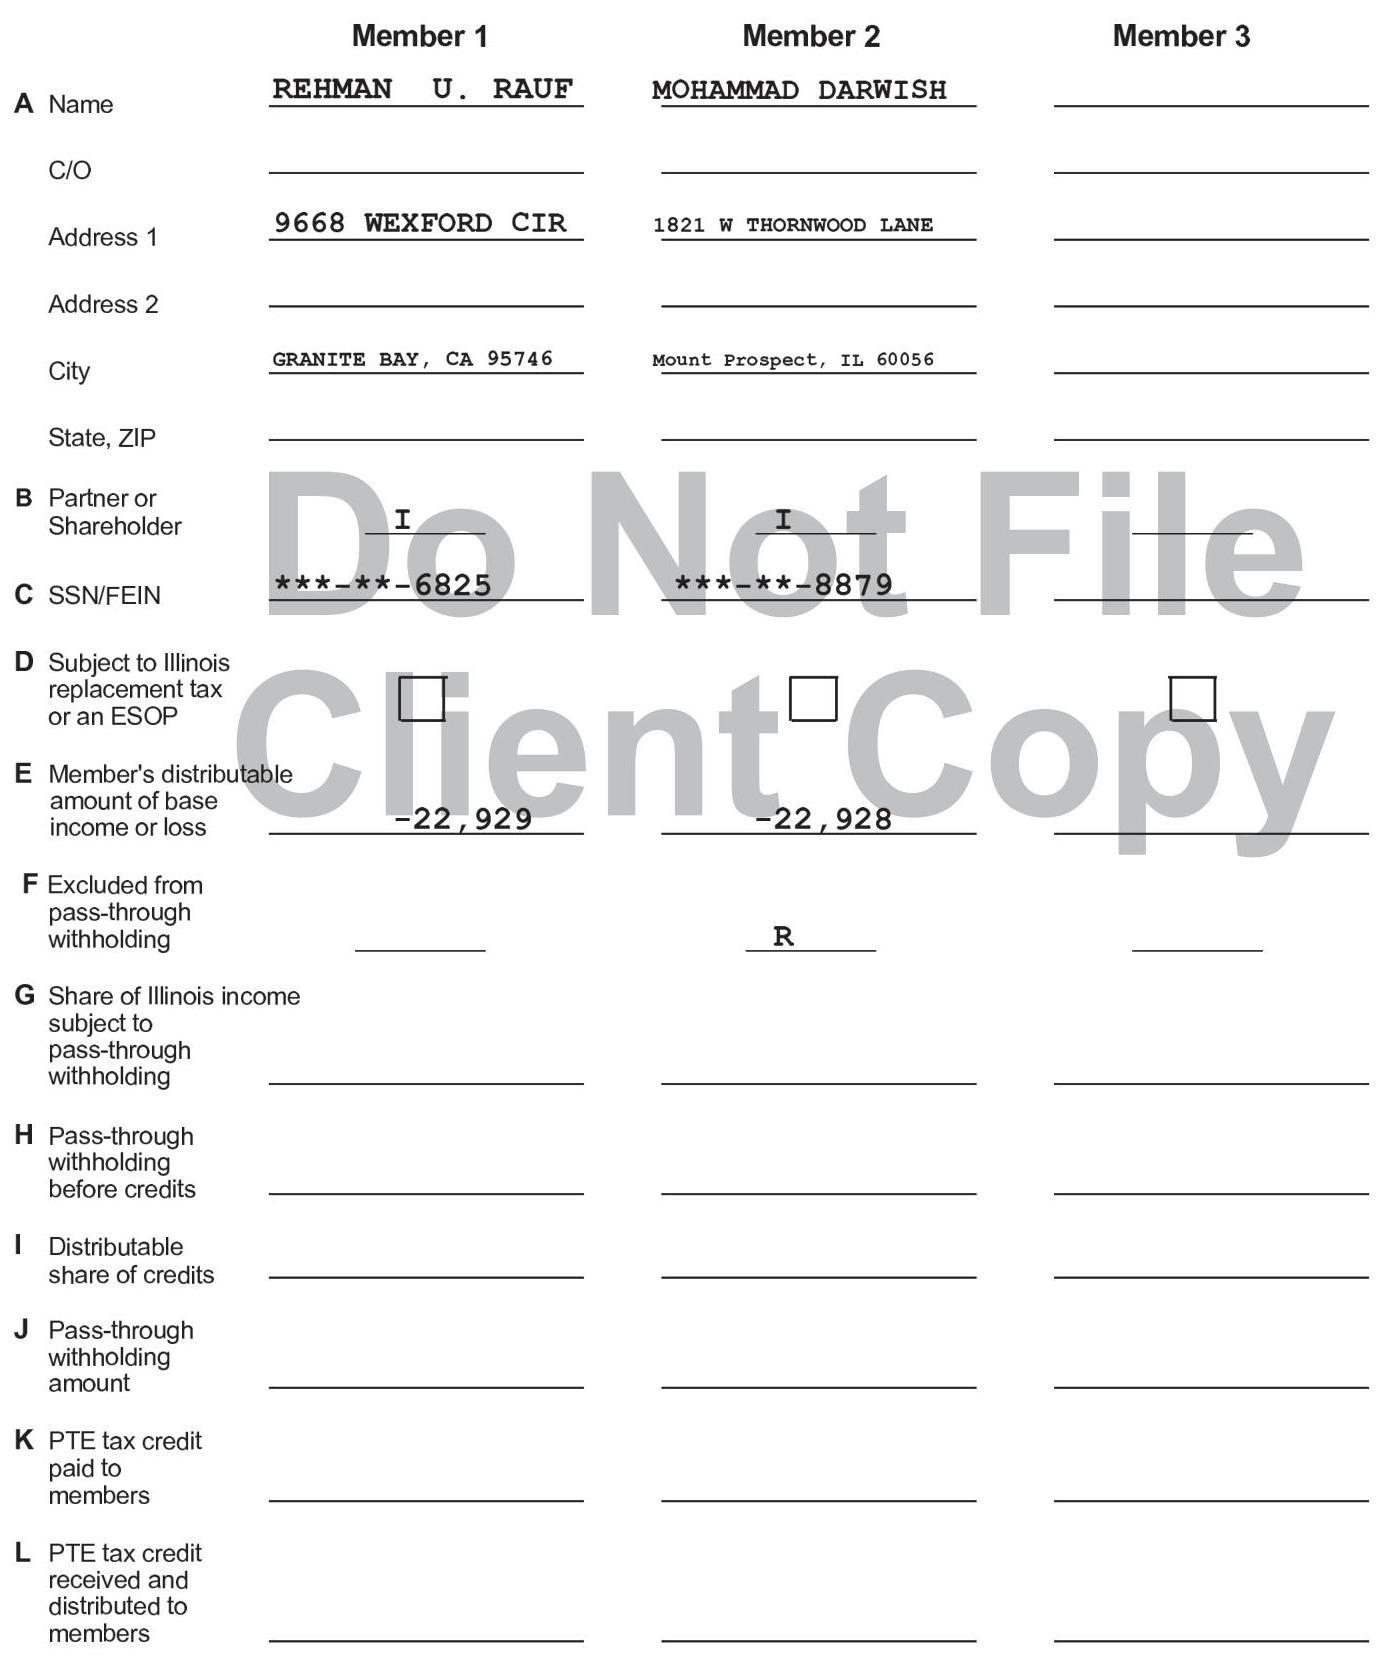

Note $\rightarrow$ If you have more members than space provided, attach additional copies of this page as necessary.

Illinois Department of Revenue Schedule K-1-P Partner's or Shareholder's Share of Income, Deductions, Credits, and Recapture To be completed by partnerships filing Form IL-1065 or S corporations filing Form IL-1120-ST.

Partners and Shareholders receiving Schedule K-1-P should attach this to their Illinois tax return.

Year ending
12 2023
Month Year
IL Attachment No. 12

# Step 1: Identify your partnership or $S$ corporation 

1 Check your business type $\boldsymbol{X}$ partnership $\square$ S corporation
2 CARTE BLANCHE INNOVATION INTEGRATE
Enter your name as shown on your Form IL-1065 or Form IL-1120-ST.

3
$* * * * * * 5609$
Enter your federal employer identification number (FEIN).
4 Enter the apportionment factor from Form IL-1065 or Form IL-1120-ST, Line 42. Otherwise, enter "1." 1.000000

## Step 2: Identify your partner or shareholder

5 REHMAN U. RAUF
Name
6 9668 WEXFORD CIR
Mailing address
GRANITE BAY, CA 95746
City
State
ZIP
7
$* * * * * *-6825$
Social Security number or FEIN
8 50.0000
Share (\%)
Step 3: Figure your partner's or shareholder's share of your nonbusiness income or loss

10 Interest
11 Dividends
12 Rental income
13 Patent royalties
14 Copyright royalties
15 Other royalty income
16 Capital gain or loss from real property
17 Capital gain or loss from tangible personal property
18 Capital gain or loss from intangible personal property
19 Other income and expense $\qquad$ 19

Step 4: Figure your partner's or shareholder's share of your business income or loss

20 Ordinary income or loss from trade or business activity
21 Net income or loss from rental real estate activities
22 Net income or loss from other rental activities
23 Interest
24 Dividends
25 Royalties
26 Net short-term capital gain or loss
27 Net long-term capital gain or loss. Total for year.
28 Unrecaptured Section 1250 gain
29 Guaranteed payments to partner (U.S. Form 1065 only)
30 Net Section 1231 gain or loss (other than casualty or theft). Total for year.
31 Other income and expense

Step 5: The new company's or shareholder's share of your company's share of your business income or loss

|  | A <br> Member's share from U.S. Schedule K-1, less nonbusiness income | B <br> Member's share apportioned to Illinois |
| :--: | :--: | :--: |
|  | $-22,929$. | $-22,929$. |
| 21 |  |  |
| 22 |  |  |
| 23 |  |  |
| 24 |  |  |
| 25 |  |  |
| 26 |  |  |
| 27 |  |  |
| 28 |  |  |
| 29 |  |  |
| 30 |  |  |
|  | 31 |  |


|  | A <br> $B$ <br> Member's share from U.S. Schedule K-1, <br> less nonbusiness income | Member's share apportioned to Illinois |
| :--: | :--: | :--: |
|  | $-22,929$. | $-22,929$. |

# Step 5: Figure your partner's or shareholder's share of Illinois additions and subtractions 

K-1-P Recipient: Before using the information provided in Step 5, you must read Schedule K-1-P(2) to correctly report the amounts listed in Columns A and B.

## Additions

32 Federally tax-exempt interest income
33 Illinois taxes and surcharge deducted. See instructions.
34 Illinois Special Depreciation addition
35 Related-Party Expenses addition
36 Distributive share of additions
37 Other additions (from Illinois Schedule M for businesses)

## Subtractions

38 a Interest from U.S. Treasury obligations (business income)
b Interest from U.S. Treasury obligations (nonbusiness income)
39 River Edge Redevelopment Zone Dividend subtraction
40 High Impact Business Dividend subtraction
41 Contribution subtraction (Form IL-1120-ST filers only)
42 River Edge Redevelopment Zone Interest subtraction (Form IL-1120-ST financial organizations only)
43 High Impact Business within a Foreign Trade Zone Interest subtraction (Form IL-1120-ST financial organizations only)
44 Illinois Special Depreciation subtraction
45 Related-Party Expenses subtraction
46 Distributive share of subtractions
47 Other subtractions (from Illinois Schedule M for businesses)

## Step 6: Figure your partner's or shareholder's (except a corporate partner or shareholder) share of your Illinois August 1, 1969, appreciation amounts

48 Section 1245 and 1250 gain
49 Section 1231 gain
50 Section 1231 gain less casualty and theft gain. See instructions.
51 Capital gain

## Step 7: Figure your partner's or shareholder's share of your Illinois credits, recapture, pass-through withholding, pass-through entity tax credit, and federal income subject to surcharge

52 Illinois Income Tax Credits
a Film Production Services
b Enterprise Zone Investment
c Enterprise Zone Construction Jobs
d High Impact Business Construction Jobs
e Affordable Housing Donations
f EDGE
g New Construction EDGE
h Research and Development
i Wages Paid to Ex-Felons
j Student-Assistance Contributions
k Angel Investment
l New Markets Development
m River Edge Historic Preservation
n River Edge Construction Jobs
o Live Theater Production
p Hospital
q Invest in Kids
r Data Center Construction Employment
s Apprenticeship Education Expense
t Historic Preservation
u REV Illinois Investment
v Agritourism Liability Insurance
w Recovery and Mental Health
x Other income tax credits

Credit Code
5000
5080
5120
5160
5260
52f
5320
5340
5380
5420
5460
5500
5540
5560
5580
5620
5820
52s
52t
52t
52u
52v
52w
52x

52y
52z
52t

52u
52v
52w
52x

Member's share from Illinois tax return

53 Other credits
a Pass-through Entity (PTE) Tax Credit See instructions.
b Replacement Tax Investment Credits See instructions.
54 Recapture
a Enterprise Zone or River Edge Redevelopment Zone Investment Credit recapture
b REV Illinois Investment Credit recapture
c Replacement Tax Investment Credit recapture
d Additional income tax credit recapture
55 Pass-through withholding See instructions.
56 Federal income attributable to transactions subject to the Compassionate Use of Medical Cannabis Program Act surcharge. See instructions.
57 Federal income attributable to the sale or exchange of assets by a gaming licensee surcharge. See instructions.

Illinois Department of Revenue Schedule K-1-P
Partner's or Shareholder's Share of Income, Deductions, Credits, and Recapture To be completed by partnerships filing Form IL-1065 or S corporations filing Form IL-1120-ST.

Partners and Shareholders receiving Schedule K-1-P should attach this to their Illinois tax return.

Year ending
12 2023
Month Year
IL Attachment No. 12

# Step 1: Identify your partnership or $S$ corporation 

1 Check your business type $\boldsymbol{X}$ partnership $\square$ S corporation
2 CARTE BLANCHE INNOVATION INTEGRATE
Enter your name as shown on your Form IL-1065 or Form IL-1120-ST.

3
$* * * * * * 5609$
Enter your federal employer identification number (FEIN).
4 Enter the apportionment factor from Form IL-1065 or Form IL-1120-ST, Line 42. Otherwise, enter "1." 1.000000

## Step 2: Identify your partner or shareholder

5 MOHAMMAD DARWISH
Name
6 1821 W THORNWOOD LANE
Mailing address
Mount Prospect, IL 60056
City
State
ZIP
7 **-**-8879
Social Security number or FEIN
8 50.0000
Share (\%)
Step 3: Figure your partner's or shareholder's share of your nonbusiness income or loss

10 Interest
11 Dividends
12 Rental income
13 Patent royalties
14 Copyright royalties
15 Other royalty income
16 Capital gain or loss from real property
17 Capital gain or loss from tangible personal property
18 Capital gain or loss from intangible personal property
19 Other income and expense $\qquad$ 19

Step 4: Figure your partner's or shareholder's share of your business income or loss

20 Ordinary income or loss from trade or business activity
21 Net income or loss from rental real estate activities
22 Net income or loss from other rental activities
23 Interest
24 Dividends
25 Royalties
26 Net short-term capital gain or loss
27 Net long-term capital gain or loss. Total for year.
28 Unrecaptured Section 1250 gain
29 Guaranteed payments to partner (U.S. Form 1065 only)
30 Net Section 1231 gain or loss (other than casualty or theft). Total for year.
31 Other income and expense

Step 5: The completed by the recipient on Line 5 only.
I am a: $\square$ grantor trust $\square$ disregard entity and the amounts on this Schedule will be reported by:
Name:
SSN or FEIN:

Step 3: Figure your partner's or shareholder's share of your nonbusiness income or loss

|  | A | B |
| :--: | :--: | :--: |
|  | Member's share from U.S. Schedule K-1, less nonbusiness income | Member's share apportioned to Illinois |
| 20 | $-22,928$. | $-22,928$. |
| 21 |  |  |
| 22 |  |  |
| 23 |  |  |
| 24 |  |  |
| 25 |  |  |
| 26 |  |  |
| 27 |  |  |
| 28 |  |  |
| 29 |  |  |
| 30 |  |  |
|  |  |  |

[^0]
[^0]:    Schedule K-1-P Page 1 (R.12/22)

# Step 5: Figure your partner's or shareholder's share of Illinois additions and subtractions 

K-1-P Recipient: Before using the information provided in Step 5, you must read Schedule K-1-P(2) to correctly report the amounts listed in Columns A and B.

## Additions

32 Federally tax-exempt interest income
33 Illinois taxes and surcharge deducted. See instructions.
34 Illinois Special Depreciation addition
35 Related-Party Expenses addition
36 Distributive share of additions
37 Other additions (from Illinois Schedule M for businesses)

## Subtractions

38 a Interest from U.S. Treasury obligations (business income)
b Interest from U.S. Treasury obligations (nonbusiness income)
39 River Edge Redevelopment Zone Dividend subtraction
40 High Impact Business Dividend subtraction
41 Contribution subtraction (Form IL-1120-ST filers only)
42 River Edge Redevelopment Zone Interest subtraction (Form IL-1120-ST financial organizations only)
43 High Impact Business within a Foreign Trade Zone Interest subtraction (Form IL-1120-ST financial organizations only)
44 Illinois Special Depreciation subtraction
45 Related-Party Expenses subtraction
46 Distributive share of subtractions
47 Other subtractions (from Illinois Schedule M for businesses)

## Step 6: Figure your partner's or shareholder's (except a corporate partner or shareholder) share of your Illinois August 1, 1969, appreciation amounts

48 Section 1245 and 1250 gain
49 Section 1231 gain
50 Section 1231 gain less casualty and theft gain. See instructions.
51 Capital gain

## Step 7: Figure your partner's or shareholder's share of your Illinois credits, recapture, pass-through withholding, pass-through entity tax credit, and federal income subject to surcharge

52 Illinois Income Tax Credits
a Film Production Services
b Enterprise Zone Investment
c Enterprise Zone Construction Jobs
d High Impact Business Construction Jobs
e Affordable Housing Donations
f EDGE
g New Construction EDGE
h Research and Development
i Wages Paid to Ex-Felons
j Student-Assistance Contributions
k Angel Investment
l New Markets Development
m River Edge Historic Preservation
n River Edge Construction Jobs
o Live Theater Production
p Hospital
q Invest in Kids
r Data Center Construction Employment
s Apprenticeship Education Expense
t Historic Preservation
u REV Illinois Investment
v Agritourism Liability Insurance
w Recovery and Mental Health
x Other income tax credits

Credit Code
5000
5080
5120
5160
5260
52f
5320
5340
5380
5420
5460
5500
5540
5560
5580
5620
5820
52s
52t
52t
52u
52v
52x
52x

52x

53 Other credits
a Pass-through Entity (PTE) Tax Credit See instructions.
b Replacement Tax Investment Credits See instructions.
54 Recapture
a Enterprise Zone or River Edge Redevelopment Zone Investment Credit recapture
b REV Illinois Investment Credit recapture
c Replacement Tax Investment Credit recapture
d Additional income tax credit recapture
55 Pass-through withholding See instructions.
56 Federal income attributable to transactions subject to the Compassionate Use of Medical Cannabis Program Act surcharge. See instructions.
57 Federal income attributable to the sale or exchange of assets by a gaming licensee surcharge. See instructions.

# 2023 Schedule K-1-P(3) 

Pass-through Withholding Calculation for Nonresident Members
To be completed by partnerships filing Form IL-1065 or S corporations filing Form IL-1120-ST.

## Read this information first:

- For tax years ending on or after December 31, 2023, and before December 31, 2024.
- You must complete Schedule K-1-P(3) for each nonresident partner or shareholder who has not submitted a Form IL-1000-E to you.
- Do not complete Schedule K-1-P(3) for any member who is a resident or who has submitted Form IL-1000-E to you.
- Do not complete Schedule K-1-P(3) if you have elected to pay Pass-through Entity Tax.

Note - Keep this schedule with your income tax records. You must send us this information if we request it.
Step 1: Identify your partnership or S corporation
1 CARTE BLANCHE INNOVATION INTEGRATED
$* * \rightarrow * * 5609$
Enter your name as shown on your Form IL-1065 or Form IL-1120-ST.
Enter your federal employer identification number (FEIN).

## Step 2: Identify your nonresident partner or shareholder

3 REHMAN U. RAUF
Name
Social Security number or FEIN
5 Check the appropriate box to identify this nonresident partner's or shareholder's organization type.
X individual corporation trust partnership S corporation estate

## Step 3: Figure your nonresident partner's or shareholder's pass-through withholding

Note - If this member is a resident or has submitted Form IL-1000-E to you, do not complete this schedule for this member.
6 Add the amounts from this member's Schedule K-1-P, Step 3, Column B, Lines 32 through 17 and 19 and enter the total here. This is your member's share of nonbusiness income allocable to Illinois before modifications and credits. See instructions before completing.
7 Add the amounts from this member's Schedule K-1-P, Step 4, Column B, Lines 20 through 27 and 29 through 31 and enter the total here. This is your member's share of business income allocable to Illinois before modifications and credits. See instructions before completing.
8 Add Line 6 and Line 7 and enter the result.
9 Add the amounts from this member's Schedule K-1-P, Column B, Lines 32 through 37 and enter the total here. This is your member's share of additions allocable to Illinois.
10 Add Line 8 and Line 9 and enter the result.
11 Add the amounts from this member's Schedule K-1-P, Column B, Lines 38a through 47 and enter the total here. If this member is an individual, partnership, trust, or estate and received Illinois August 1, 1969, appreciation amounts from you, see instructions. This is your member's share of subtractions allocable to Illinois.
12 Subtract Line 11 from Line 10. If negative, enter zero. This is your member's share of Illinois income subject to pass-through withholding.See instructions.
Note - If this member is a nonresident individual or estate, enter zero on Lines 13 through 15 and go to Line 16.
13 Replacement tax before credits. If this member is a partnership, S corporation, or nonresident trust, multiply Line 12 by $1.5 \%(.015)$ and enter the result. corporation, multiply Line 12 by $2.5 \%(.025)$ and enter the result.
14 Enter the amount of Illinois replacement tax investment credits passed to this member and available for use this year.
15 Subtract Line 14 from Line 13. If negative, enter zero. This is your member's share of replacement tax after credits.
Note - If this member is a nonresident partnership or S corporation, enter zero on Lines 16 through 18 and go to Line 19.
16 Income Tax before credits. See instructions.
17 Enter the amount of Illinois income tax credits passed to this member and available for use this year. See instructions.
18 Subtract Line 17 from Line 16. If negative, enter zero.
This is your member's share of income tax after credits.
19 Add Lines 15 and 18 and enter the result. This is your member's total pass-through withholding. Report this amount on this member's Schedule K-1-P, Step 7, Line 55. You must also report this amount on your Form IL-1065 or Form IL-1120-ST, Schedule B, Section B, Line J, on the line which reports this member's amounts.
Keep a copy of this schedule for each member with your income tax records. Do not send Schedule K-1-P(3) to your members or submit it to Illinois Department of Revenue unless we specifically request it from you.

# 2023 Partner List for CARTE BLANCHE INNOVATION INTEGRATED LLC 

| Partner Name and Address | Ending Capital <br> Percentage | Ending Capital <br> Amount |
| :-- | :--: | :--: |
| REHMAN U. RAUF <br> 9668 WEXFORD CIR <br> GRANITE BAY, CA 95746 | $50.0000 \%$ | $-31,227$ |
| MOHAMMAD DARWISH <br> 1821 W THORNWOOD <br> LANE <br> Mount Prospect, IL 60056 | $50.0000 \%$ | $-31,225$ |
| TOTALS | $100.0000 \%$ | $-62,452$ |

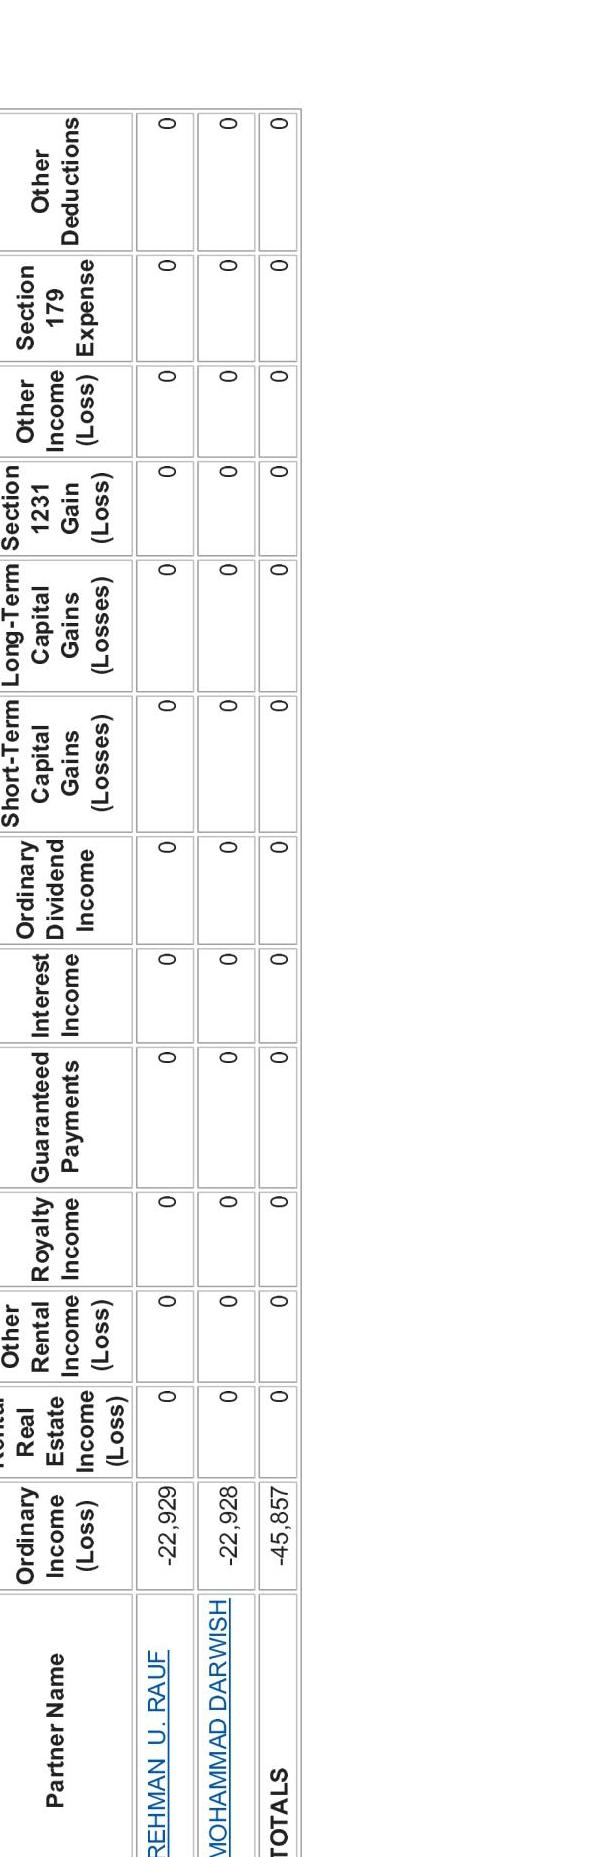

# Federal Electronic Filing Instructions 

## Tax Year 2023

You are responsible for confirming the status of the electronically filed return.
You can check the status of your client's returns by clicking the Refresh button in the Professional Reports.

You do not need to mail any paper signature forms to the IRS. The general partner of the partnership and preparer are required to sign Form 8879-PE and retain the completed form for three years from the return due date or IRS received date, whichever is later. Electronic storage is acceptable. The return has been successfully filed once an acceptance from the IRS is received.

# Prior Year Comparison 

CARTE BLANCHE INNOVATION INTEGRATED LLC

## Income

Gross receipts or sales
Less returns and allowances
Cost of goods sold
Gross profit
Ordinary inc (loss) from partnerships
Net farm income (loss)
Net gain (loss) from From 4797, part II
Other income (loss)
Total income (loss)

## 2022

2023

## Difference

$12,553
$79,946
$67,393
$33
$11,196
$79,337
$68,141
$1,357
$576
$-781
$0
$0
$0
$0$
$1,357
$576
$-781

## Deductions

| Salaries and wages | \$0 | \$0 | \$0 |
| :-- | :-- | :-- | :-- |
| Guaranteed payments to partners | \$0 | \$0 | \$0 |
| Repairs and maintenance | \$0 | \$0 | \$0 |
| Bad debts | \$0 | \$0 | \$0 |
| Rents | \$0 | \$0 | \$0 |
| Taxes and licenses | \$0 | \$0 | \$0 |
| Interest | \$0 | \$0 | \$0 |
| Depreciation | \$0 | \$0 | \$0 |
| Depletion | \$0 | \$0 | \$0 |
| Retirement plans, etc. | \$0 | \$0 | \$0 |
| Employee benefit programs | \$0 | \$0 | \$0 |
| Energy efficient commercial buildings deduction | \$0 | \$0 | \$0 |
| Other deductions | \$17,952 | \$46,433 | \$28,481 |

|  Total deductions | $17,952 | $46,433 | $28,481  |
| --- | --- | --- | --- |
|  Ordinary business income (loss) | $-16,595 | $-45,857 | $-29,262  |
|  Tax and Payment |  |  |   |
|  Interest due (look-back method, Form 8697) | $0 | $0 | $0  |
|  Interest due (look-back method, Form 8866) | $0 | $0 | $0  |
|  BBA AAR imputed underpayment | $0 | $0 | $0  |
|  Other taxes | $0 | $0 | $0  |
|  Total balance due | $0 | $0 | $0  |
|  Payment | $0 | $0 | $0  |
|  Amount owed | $0 | $0 | $0  |
|  Overpayment | $0 | $0 | $0  |
|  Schedule L Balances |  |  |   |
|  Beginning assets | $0 | $0 | $0  |
|  Beginning liabilities and equity | $0 | $0 | $0  |
|  Ending assets | $0 | $0 | $0  |
|  Ending liabilities and equity | $-16,595 | $0 | $16,595  |
|  Schedule K/K-1 Items |  |  |   |
|  Cash distributions | $0 | $0 | $0  |
|  Property distributions | $0 | $0 | $0  |
|  Partners' beginning capital accounts | $0 | $-16,595 | $-16,595  |
|  Partners' ending capital accounts | $-16,595 | $-62,452 | $-45,857  |

# Illinois Electronic Filing Instructions 

## Tax Year 2023

These instructions are provided to help you understand and complete the final steps for electronically filing CARTE BLANCHE INNOVATION INTEGRATED LLC's Illinois return. We highly recommend that you print these instructions for your reference.

You are responsible for confirming the status of CARTE BLANCHE INNOVATION INTEGRATED LLC's electronically filed return.

You can confirm the status of this return by going to:
https://www.taxact.com/ef/efile-center. You will need to enter your EFIN and password. You can also check the status of your clients' returns by clicking the Refresh button in the Professional Reports.

## Illinois Partnership Income Tax

## Illinois Form IL-1065:

Do not send any other Illinois schedules or forms to the Illinois Department of Revenue. These documents should remain a part of CARTE BLANCHE INNOVATION INTEGRATED LLC's tax files.

The Illinois Department of Revenue does not require CARTE BLANCHE INNOVATION INTEGRATED LLC's return or any signature document. CARTE BLANCHE INNOVATION INTEGRATED LLC's return has been successfully filed once you receive an acceptance from the Illinois Department of Revenue.

In [20]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    """
    Replace image placeholders in markdown with base64-encoded images.

    Args:
        markdown_str: Markdown text containing image placeholders
        images_dict: Dictionary mapping image IDs to base64 strings

    Returns:
        Markdown text with images replaced by base64 data
    """
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
        )
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    """
    Combine OCR text and images into a single markdown document.

    Args:
        ocr_response: Response from OCR processing containing text and images

    Returns:
        Combined markdown string with embedded images
    """
    markdowns: list[str] = []
    # Extract images from page
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = img.image_base64
        # Replace image placeholders with actual images
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display combined markdowns and images
display(Markdown(get_combined_markdown(pdf_response)))

## Mistral OCR with Image

In addition to the PDF file shown above, Mistral OCR can also process image files:

In [21]:
import base64

# Verify image exists
image_file = Path("receipt.png")
assert image_file.is_file()

# Encode image as base64 for API
encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

# Process image with OCR
image_response = client.ocr.process(
    document=ImageURLChunk(image_url=base64_data_url),
    model="mistral-ocr-latest"
)

# Convert response to JSON
response_dict = json.loads(image_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

AssertionError: 

## Extract structured data from OCR results

OCR results can be further processed using another model.

Our goal is to extract structured data from these results. To achieve this, we will utilize the `pixtral-12b-latest` model, supported by our OCR model, to deliver better and higher-quality answers:

In [22]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))

NameError: name 'image_response' is not defined

In the example above, we are leveraging a model already capable of vision tasks.

However, we could also use text-only models for the structured output. Note in this case, we do not include the image in the user message:

In [23]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))


NameError: name 'image_response' is not defined

## All Together - Mistral OCR + Custom Structured Output
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: str  # string
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/).

In [ ]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64


class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: str
    ocr_contents: dict

def structured_ocr(image_path: str) -> StructuredOCR:
    """
    Process an image using OCR and extract structured data.

    Args:
        image_path: Path to the image file to process

    Returns:
        StructuredOCR object containing the extracted data

    Raises:
        AssertionError: If the image file does not exist
    """
    # Validate input file
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(
        document=ImageURLChunk(image_url=base64_data_url),
        model="mistral-ocr-latest"
    )
    image_ocr_markdown = image_response.pages[0].markdown

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        f"This is the image's OCR in markdown:\n{image_ocr_markdown}\n.\n"
                        "Convert this into a structured JSON response "
                        "with the OCR contents in a sensible dictionnary."
                        )
                    )
                ]
            }
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

We can now extract structured output from any image parsed with our OCR model.

In [ ]:
# Example usage
image_path = "receipt.png" # Path to sample receipt image
structured_response = structured_ocr(image_path) # Process image and extract data

# Parse and return JSON response
response_dict = json.loads(structured_response.model_dump_json())
print(json.dumps(response_dict, indent=4))

{
    "file_name": "parking_receipt",
    "topics": [
        "Parking",
        "Receipt",
        "Payment"
    ],
    "languages": "English",
    "ocr_contents": {
        "header": "PLACE FACE UP ON DASH",
        "city": "CITY OF PALO ALTO",
        "validity": "NOT VALID FOR ONSTREET PARKING",
        "expiration": {
            "date": "AUG 19, 2024",
            "time": "11:59 PM"
        },
        "purchase": {
            "date": "Aug 19, 2024",
            "time": "01:34pm"
        },
        "total_due": "$15.00",
        "rate": "Daily Parking",
        "total_paid": "$15.00",
        "payment_type": "CC (Swipe)",
        "ticket_number": "00005883",
        "serial_number": "520117260957",
        "setting": "Permit Machines",
        "machine_name": "Civic Center",
        "card_info": "#^^^^-1224, Visa",
        "footer": {
            "display_instructions": "DISPLAY FACE UP ON DASH",
            "expiration_reminder": "PERMIT EXPIRES AT MIDNIGHT"
        }
    }
}


The original image for comparison can be found below.

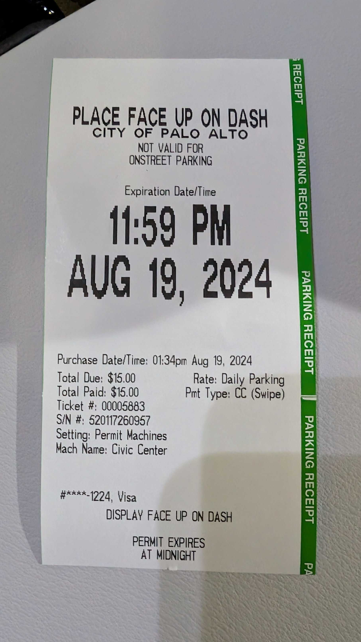

In [ ]:
from PIL import Image

image = Image.open(image_path)
image.resize((image.width // 5, image.height // 5))
